<a href="https://colab.research.google.com/github/AnnaCarvajalMiranda/Food-Hub-Market-Analysis/blob/main/LowCode_ACM_FoodHub_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [341]:

# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Understanding the structure of the data

In [342]:

# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')


In [343]:

# Read the data
df = pd.read_csv('foodhub_order.csv')
# Returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data?

In [344]:

# Write your code here
df.shape

print('The data frame has', df.shape[0], 'rows and', df.shape[1], 'columns' )


The data frame has 1898 rows and 9 columns


**Observations**:

The Rating column seems to be a mixed type variable, as we can see it include strings for missed ratings 'Not given'. We'll need to explore this further with .info()

The client is interested in demand for restaurants. Demand is evaluated by the number of orders.

### **Question 2:** What are the datatypes of the different columns in the dataset?

In [345]:

# Use info() to print a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations:**

We have 9 variables: dtypes: float64(1), int64(4), object(4)

4 of type integer: order_id, customer_id, food_preparation_time, delivery_time

4 of type object: restaurant_name, cuisine_type, rating, day_of_the_week

and one of type float: cost_of_the_order

We observe that each columns have the same amount of entries (1898).

Note: Rating is currently an object, it should be a float. This may be because the column includes values 'Not given' which is of type string.

In [346]:

df['rating'].unique()


array(['Not given', '5', '3', '4'], dtype=object)

**Treating misaligned values** - rating: we'll want to do calculations on the rating variable, like getting the mean rating. And it is not interesting to us in this analysis to explore 'not given' as a categorical group, so we'll replace it to NaN.

In [347]:

# replacing values with nan
df['rating'] = df['rating'].replace(['Not given'], np.nan)

# changing data type to float
df['rating'] = df['rating'].astype(float)

# checking the change has successfuly been done
df.info()

# checking if NaN is present in the data frame
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [348]:

# making a copy of the data frame before treating missing values

df_original= df.copy()


In [349]:

# Checking for missing values in the data
df.isnull().sum()


order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [350]:

# Checking the percentage of missing values
df.isnull().sum()[df.isnull().sum()>0]/df.shape[0]*100


rating    38.777661
dtype: float64

**Observations:**

There are missing values in 1 columns of the data: 736 missing values for 'rating' column.
38% of our rating data is missing. We could consider whether imputation methods could be useful for handling these missing values.
We will treat these missing values after understanding the distributions of features in the data, the relationships that exist in the data. This will help us impute these values more effectively.

**Exploring missing values for 'rating'bold text**

In [351]:

# checking if there is a pattern of missing values accross days of the week

df.loc[df['rating'].isnull() == True, 'day_of_the_week'].value_counts()/df['day_of_the_week'].value_counts()*100


day_of_the_week
Weekend    39.156181
Weekday    37.842779
Name: count, dtype: float64

In [352]:

# checking if there is a pattern of missing values accross cuisine types

df.loc[df['rating'].isnull() == True, 'cuisine_type'].value_counts()/df['cuisine_type'].value_counts()*100


cuisine_type
American          36.986301
Chinese           38.139535
French            44.444444
Indian            31.506849
Italian           42.281879
Japanese          41.914894
Korean            30.769231
Mediterranean     30.434783
Mexican           37.662338
Middle Eastern    30.612245
Southern          23.529412
Spanish           50.000000
Thai              52.631579
Vietnamese        28.571429
Name: count, dtype: float64

In [353]:

# creating a new variable that captures the patterns of missingness

df_original['rating_missing'] = df_original['rating'].isnull().astype(int)


<Axes: xlabel='rating_missing', ylabel='count'>

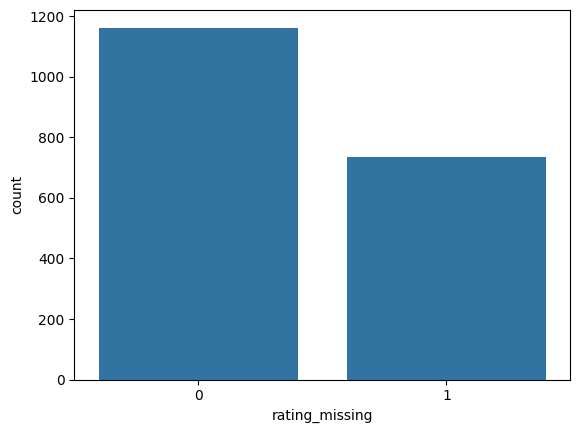

In [354]:

# We can visualize the missing counts for 'rating'
sns.countplot(df_original, x='rating_missing')


<Axes: >

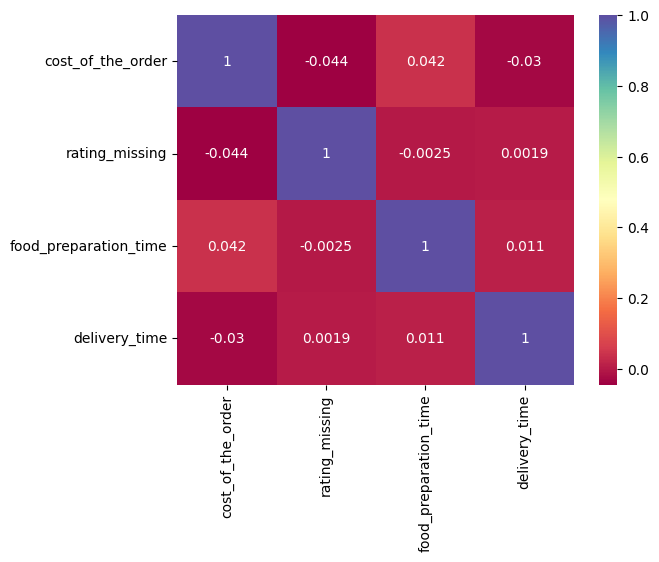

In [355]:

# Let's now visualize the correlation table for missingness of 'rating'
sns.heatmap(data=df_original[['cost_of_the_order','rating_missing','food_preparation_time','delivery_time']].corr(), annot=True, cmap='Spectral')


**Observations**

It appears that the proportion of missing values is fairly consistent regardless of the day of the week or cuisine type. This suggests that the missingness is not heavily biased toward a specific day or cuisine.
Note there is a higher percentage of missing values for 'French', 'Thai' and 'Spanish' cuisines, however this is consistent with the fewer number of orders for these types of cuisine. The fact the correlation table for missingness of rating shows little correlation between cuisine type and rating also confirms the variance is not explained by cuisine types. This could still be explained by some other factor.
Misssingness of r

**Treating missing values for 'rating'**

One approach to treat the missing ratings would be to group the data on the basis of restaurants in a cuisine type to get a better idea of the average ratings.
Then we could impute the missing values of each restaurant by their existing average rating (mean). Note that some restaurants have no ratings, these would have to be treated separately.
For restaurants without rating, we could impute the missing ratings by the average rating of their respective cuisine type.

**Assumptions and limitations**

We're assuming the missingness is missing completely at random (MCAR). And there are several reasons reinforcing this assumption:
The proportion of missingness is fairly consistent accross day of the week and cuisine types.
There is little variance in missingness explained by food prep, delivery time and cost of order.
For restaurants without any ratings, we're assuming that all restaurants of a certain cuisine type are of similar quality, which might not be the case.

There are several outliers for the distribution of ratings for each restaurant, which invalidates the use of the mean. Furthermore, there are a lot of restaurants with a very low number of ratings. This makes the use of the median not ideal as well. Given the limitations of our data set for restaurants with few ratings, a better method would be a weighted average that takes into account the number of reviews a restaurant has received.

The imputation strategy should be validated by comparing the distributions of other variables in two data sets, one with missing 'rating' and one with observed 'rating'. This to ensure these are not significantly different, and that imputation is not creating unwanted bias.

In [356]:

# checking the average rating by restaurant name and cuisine type
df.groupby(['cuisine_type', 'restaurant_name'])['rating'].mean()


cuisine_type  restaurant_name           
American      'wichcraft                    5.000000
              5 Napkin Burger               4.000000
              67 Burger                     5.000000
              Alidoro                            NaN
              Bareburger                    4.058824
                                              ...   
Thai          Song Thai Restaurant & Bar    5.000000
              Spice Thai                         NaN
Vietnamese    Nha Trang One                 3.000000
              V-Nam Cafe                    4.000000
              Xe May Sandwich Shop          5.000000
Name: rating, Length: 179, dtype: float64

In [357]:

# checking the average rating by cuisine type
df.groupby(['cuisine_type'])['rating'].mean()


cuisine_type
American          4.298913
Chinese           4.338346
French            4.300000
Indian            4.540000
Italian           4.360465
Japanese          4.373626
Korean            4.111111
Mediterranean     4.218750
Mexican           4.416667
Middle Eastern    4.235294
Southern          4.307692
Spanish           4.833333
Thai              4.666667
Vietnamese        4.000000
Name: rating, dtype: float64

In [358]:

# filling missing values for restaurants having been already rated at least once
df.groupby(['restaurant_name'])['rating'].transform('mean') #initiate the lookup table

#imputing missing values in rating
df['rating'] = df['rating'].fillna(value= df.groupby(['cuisine_type', 'restaurant_name'])['rating'].transform('mean'))


In [359]:

# Checking the remaining missing values, that should be the ones corresponding to restaurants without rating yet
df.isnull().sum()


order_id                  0
customer_id               0
restaurant_name           0
cuisine_type              0
cost_of_the_order         0
day_of_the_week           0
rating                   30
food_preparation_time     0
delivery_time             0
dtype: int64

In [360]:

# filling the remaining missing values with the rating mean of their corresponding cuisine type
df.groupby(['cuisine_type'])['rating'].transform('mean') #initiate the lookup table

#imputing missing values in rating
df['rating'] = df['rating'].fillna(value= df.groupby(['cuisine_type'])['rating'].transform('mean'))


In [361]:

# Checking if we imputed all missing values succesfully
df.isnull().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [362]:

# checking for duplicates in the data.
df.duplicated().sum()


0

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [363]:

# Write your code here
df.describe().T


,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1.477496e+06,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,1.286000e+05,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,1.414000e+01,2.229750e+01,35.41
rating,1898.0,4.349919e+00,0.606307,3.00,4.00,4.328125e+00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,2.700000e+01,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,2.500000e+01,2.800000e+01,33.00


**Observations:**

**Cost_of_the_order**: On average the order costs 14 dollars . Also, 75% of the orders cost less than or equal to 22 dollars. The minimum cost is 4.5 dollars and the maximum cost is 35 $, indicating the range of order cost is big. There is a notable difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column. The data seems to be quite sparse, indicated by a notable standard deviation of 7.5 with a mean and median of 16.4 and 14.1 respectively.

**Rating**: The average rating of orders is 4.3 . There are no orders under 3/5.

**The distribution of the food_preparation_time and delivery_time** is fine. There doesn't seem to be extreme values, their standard deviation are fine, around 4.6 and 5 minutes respectively, which indicates there is no big variation in food preparation and delivery time accross orders.

**Distribution, Skewness and Bias Observations**

In [364]:

# Making a list of all categorical variables
cat_cols =  ['restaurant_name', 'day_of_the_week', 'cuisine_type']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
--------------------------------------------------
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
--------------------------------------------------
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
--------------------------------------------------


In [365]:

# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)


restaurant_name
Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: proportion, Length: 178, dtype: float64
--------------------------------------------------
day_of_the_week
Weekend    0.711802
Weekday    0.288198
Name: proportion, dtype: float64
--------------------------------------------------
cuisine_type
American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0

In [366]:

df.groupby(['cuisine_type'] ) ['restaurant_name'].value_counts()


cuisine_type  restaurant_name            
American      Shake Shack                    219
              Blue Ribbon Fried Chicken       96
              Five Guys Burgers and Fries     29
              Bareburger                      27
              The Meatball Shop               20
                                            ... 
Thai          Hampton Chutney Co.              1
              Klong                            1
Vietnamese    V-Nam Cafe                       4
              Xe May Sandwich Shop             2
              Nha Trang One                    1
Name: count, Length: 179, dtype: int64

**Observations**:

Highest number of orders (219) are made with Shake Shack folllowed the Meat Ball Shop (132)
Orders seem to soar in the weekends, getting almost 3 times the orders compared to the weekday.
30 % of all orders come from 5 restaurants out of 178 restaurants: shake shack, the meatball shop, blue ribbon sushi, blue ribbon fried chicken, and Parm.
80% of all orders come from American Japanese Italian and Chinese restaurants, which are 4 our of 14 cuisine types. Leaving all other 10 cuisine types with the rest 20%.

### **Question 5:** How many orders are not rated?

In [367]:

# Counting how many orders are not rated (original dataset)
print(df_original['rating'].isnull().sum(), 'orders are not rated in the data')


736 orders are not rated in the data


**Observations**:

736 Orders are not rated out of 1898 entries. Which means a little less than half of orders are note rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

**Methodology**

We'll analyse the numerical continuous variables with histograms, boxplots: cost, food_prepration_time, delivery_time
We'll analyse categorical variables with count plots: restaurant_name, cuisine_type, rating, day_of_the_week,

####**Order ID**

In [368]:

# check unique order ID
df['order_id'].nunique()


1898

#### Customer ID

In [369]:

# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID


1200

####**Restaurant Name**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


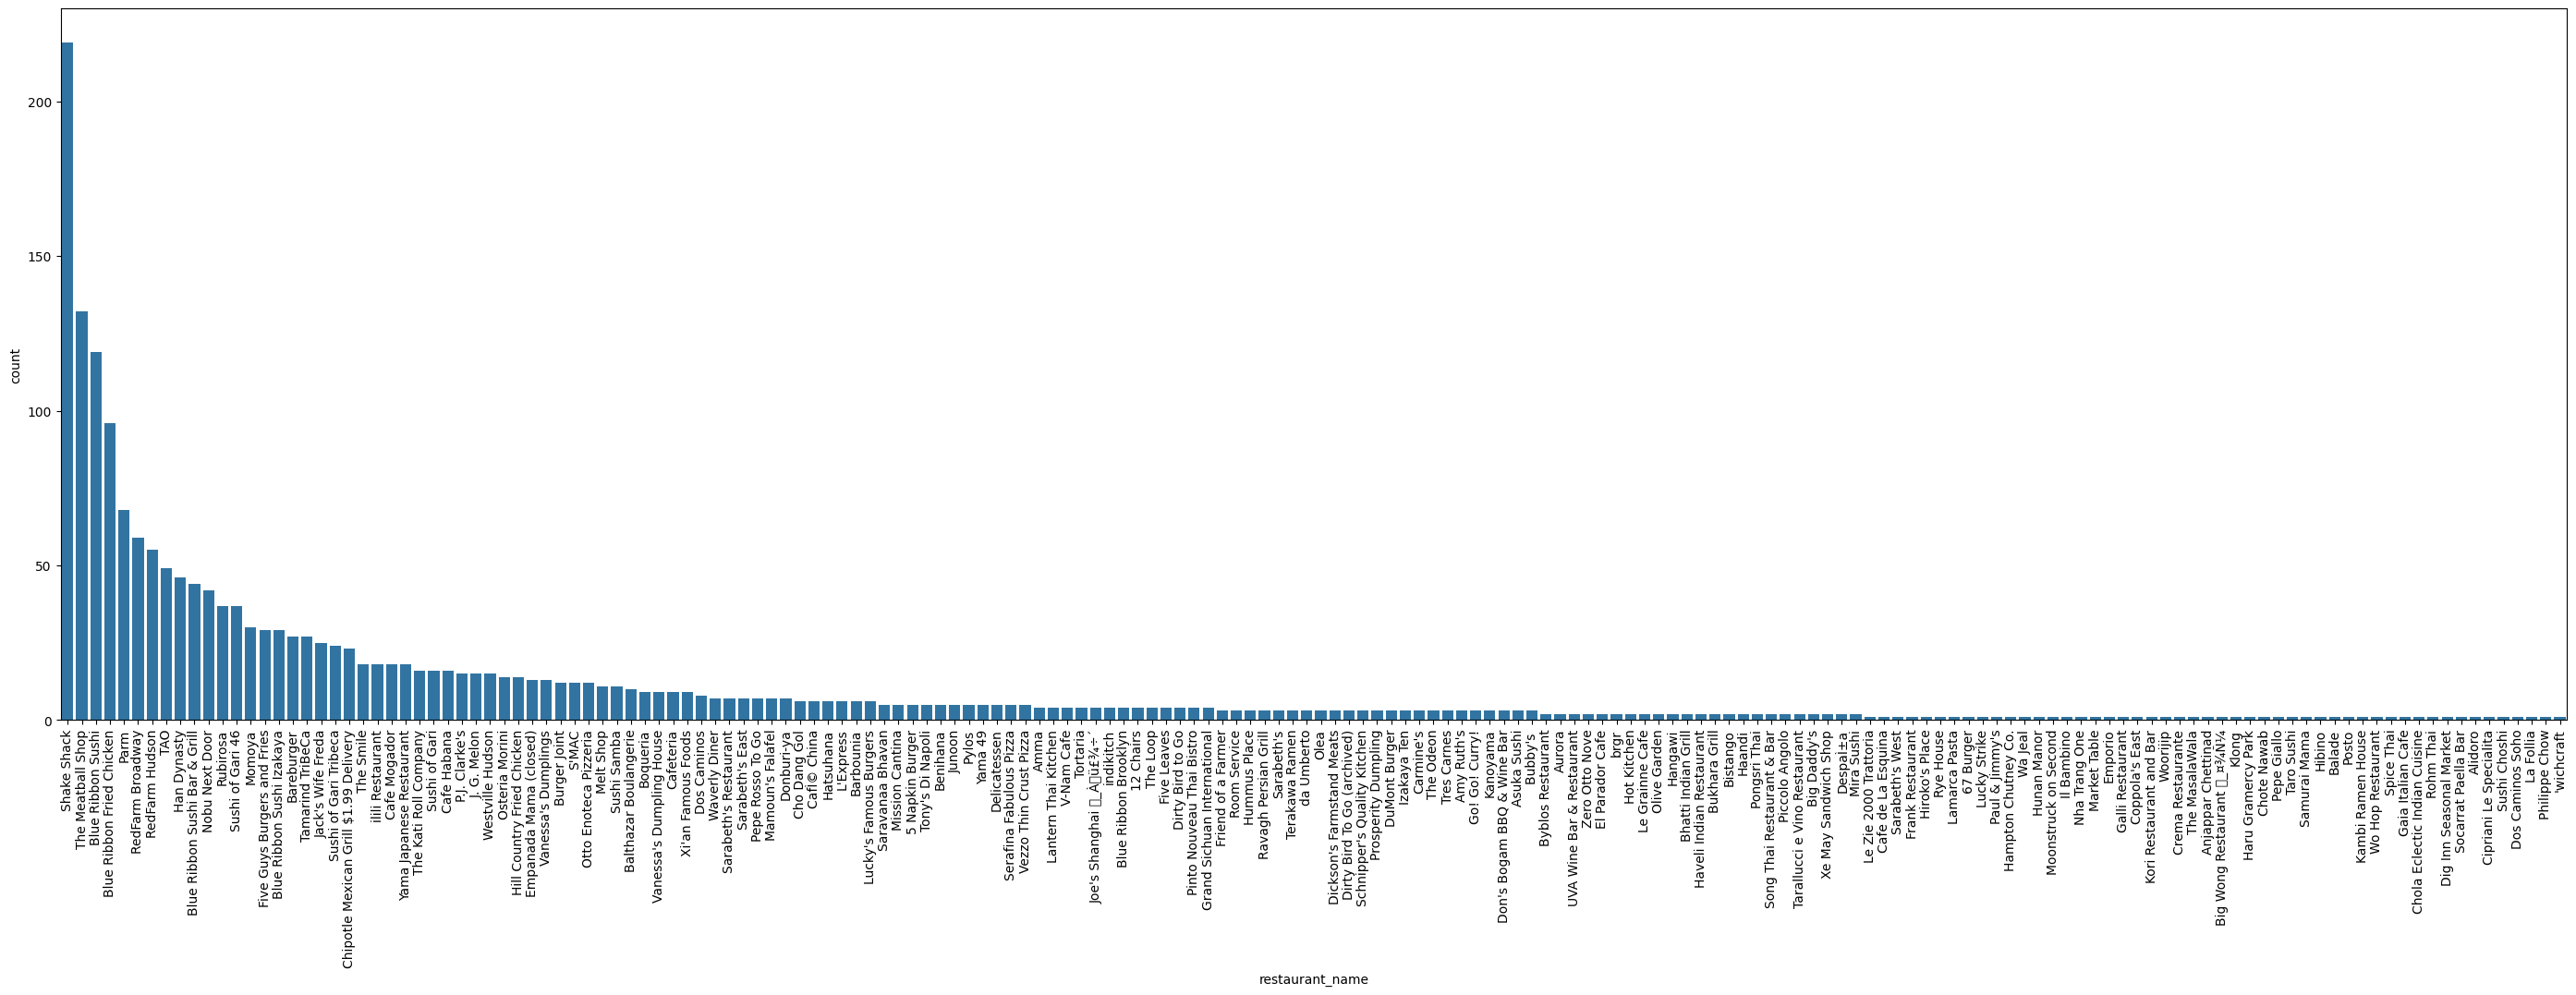

In [370]:

# Observations on restaurants
plt.figure(figsize=(35, 10))
orderrest = df['restaurant_name'].value_counts().index
sns.countplot(data=df,x='restaurant_name', order=orderrest)
plt.xticks(rotation=90)
plt.show()


####**Cuisine Type**

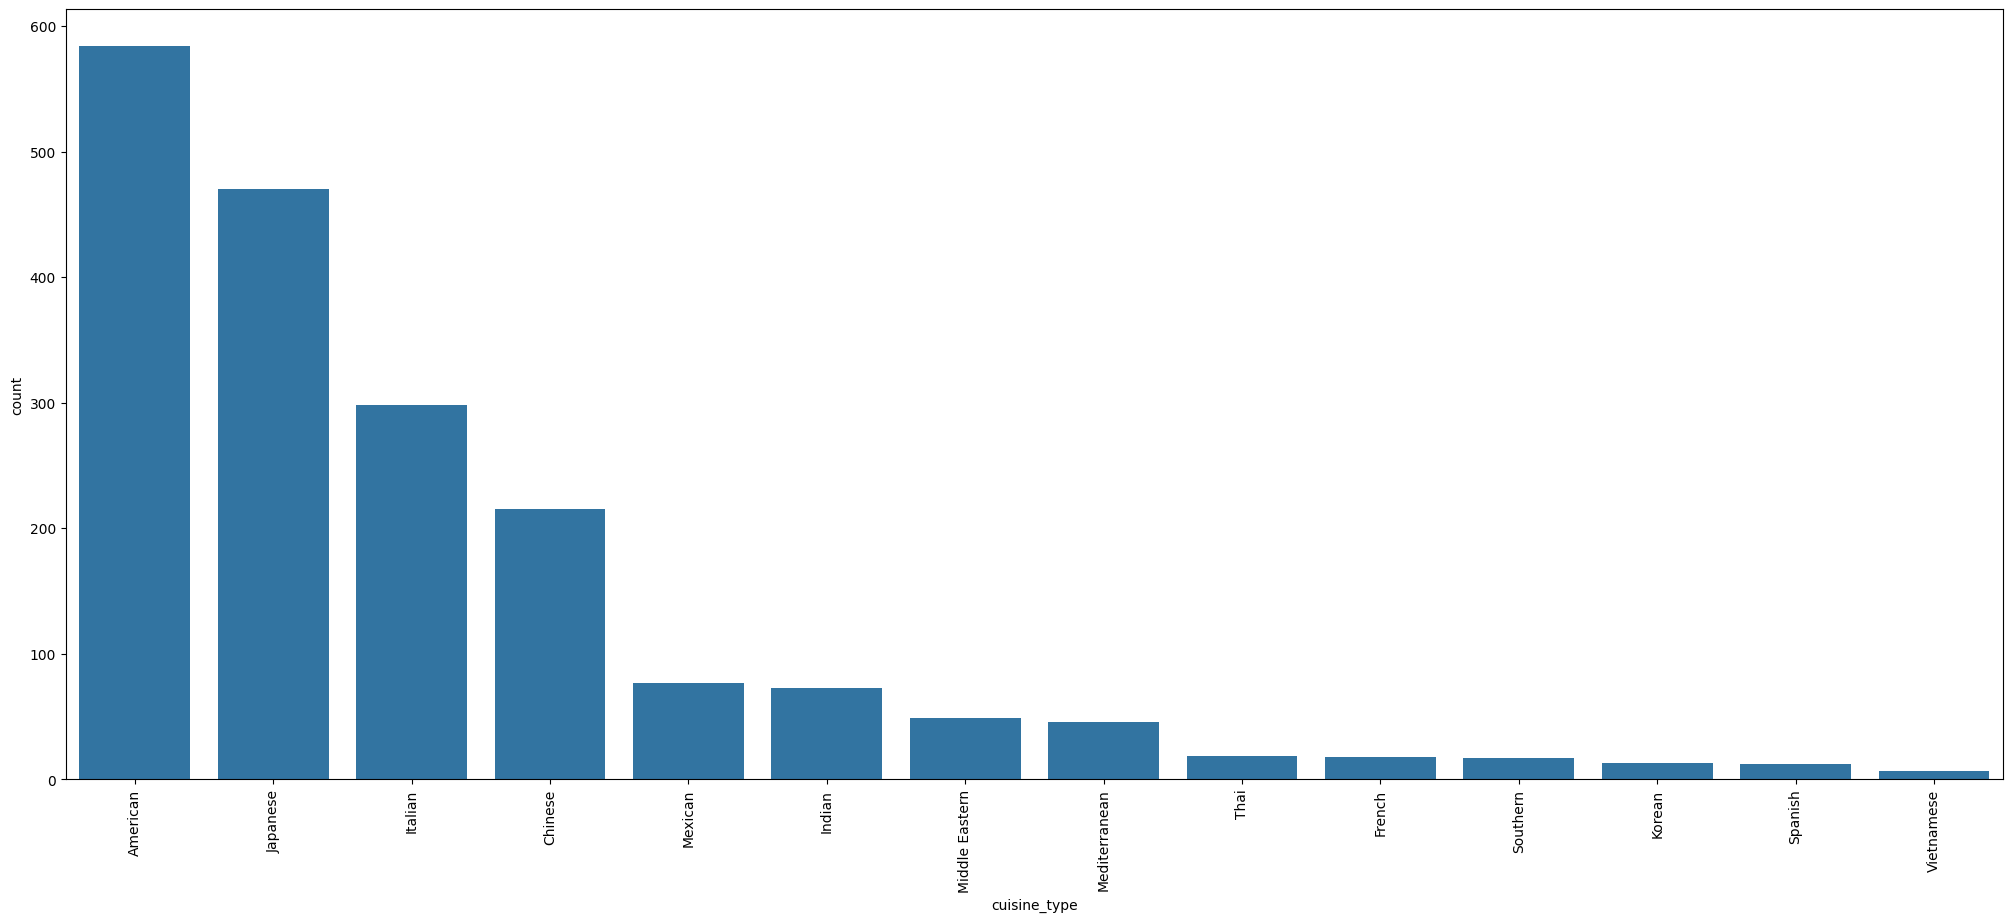

In [371]:

# Observations on types of cuisine
plt.figure(figsize=(25, 10))
order = df['cuisine_type'].value_counts().index
sns.countplot(data=df,x='cuisine_type', order=order)
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='cuisine_type', ylabel='count'>

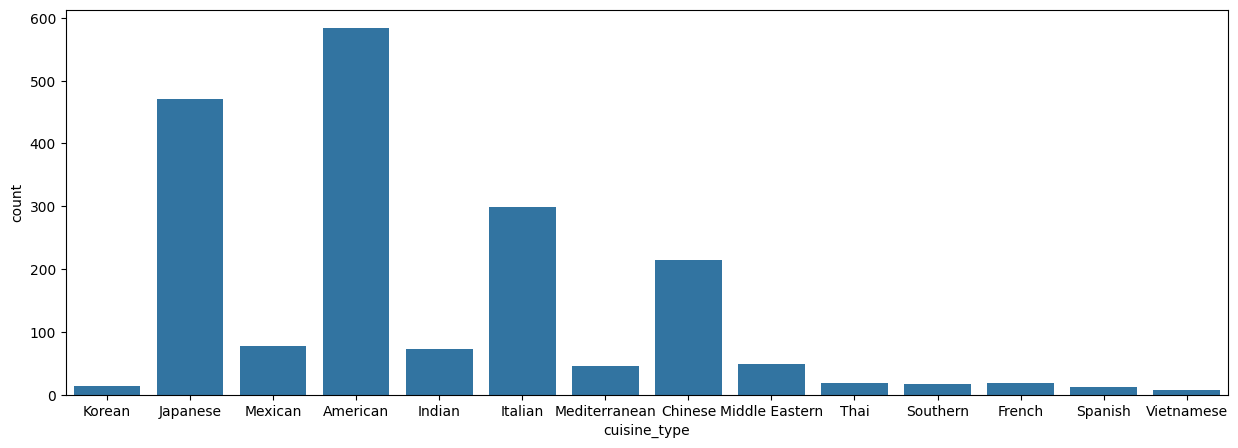

In [372]:

plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.


In [373]:

df['cuisine_type'].value_counts()


cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

####**Cost of the Order**

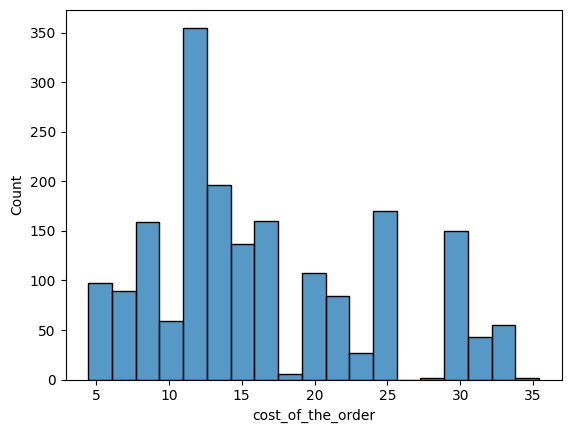

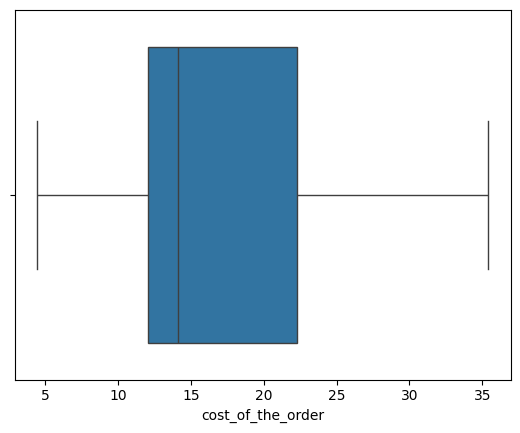

In [374]:

sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()


####**Day of the Week**

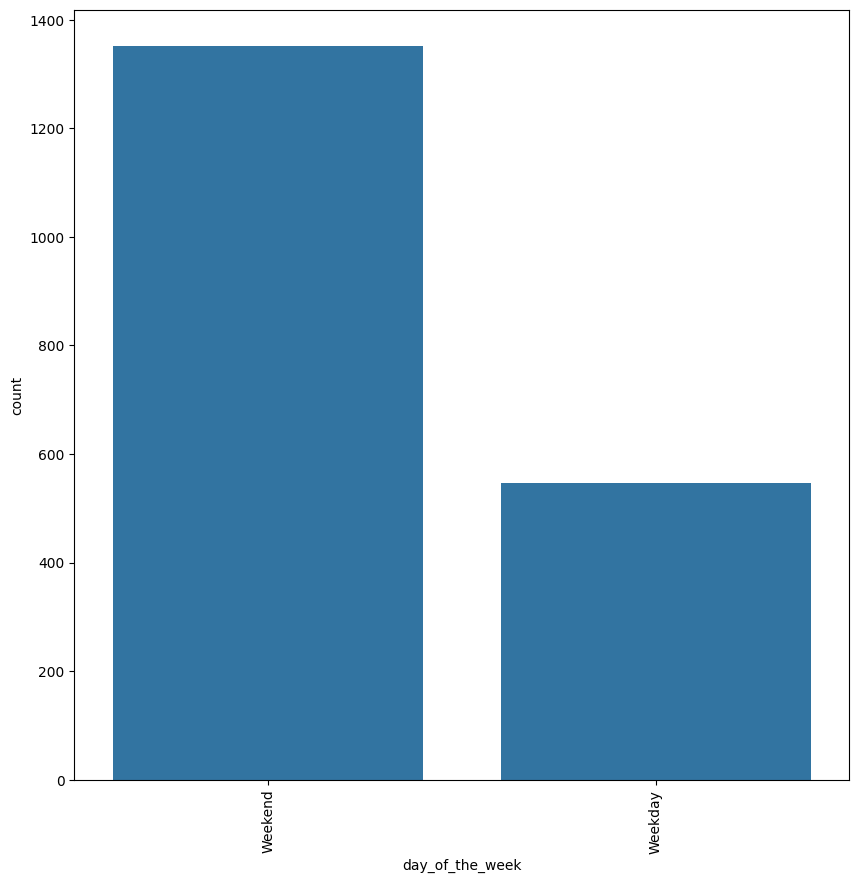

In [375]:

# Observations on weekday vs weekends
plt.figure(figsize=(10, 10))
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()


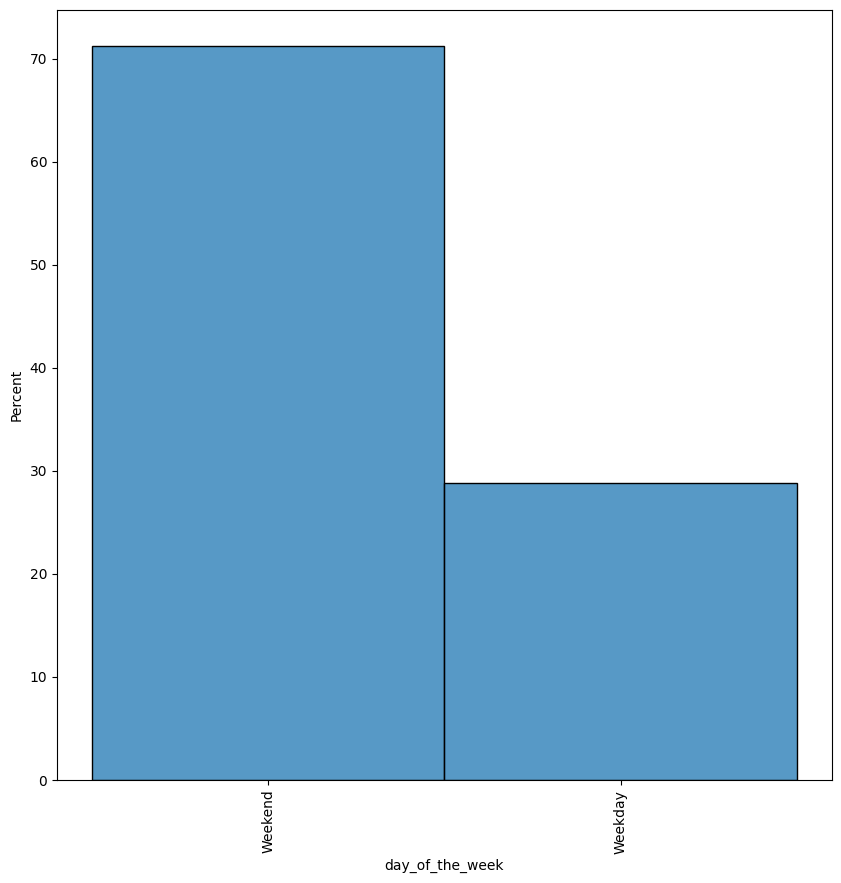

In [376]:

# Let's check the proportion of orders on weekday vs weekends
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='day_of_the_week', stat= 'percent')
plt.xticks(rotation=90)
plt.show()


#### **Rating**

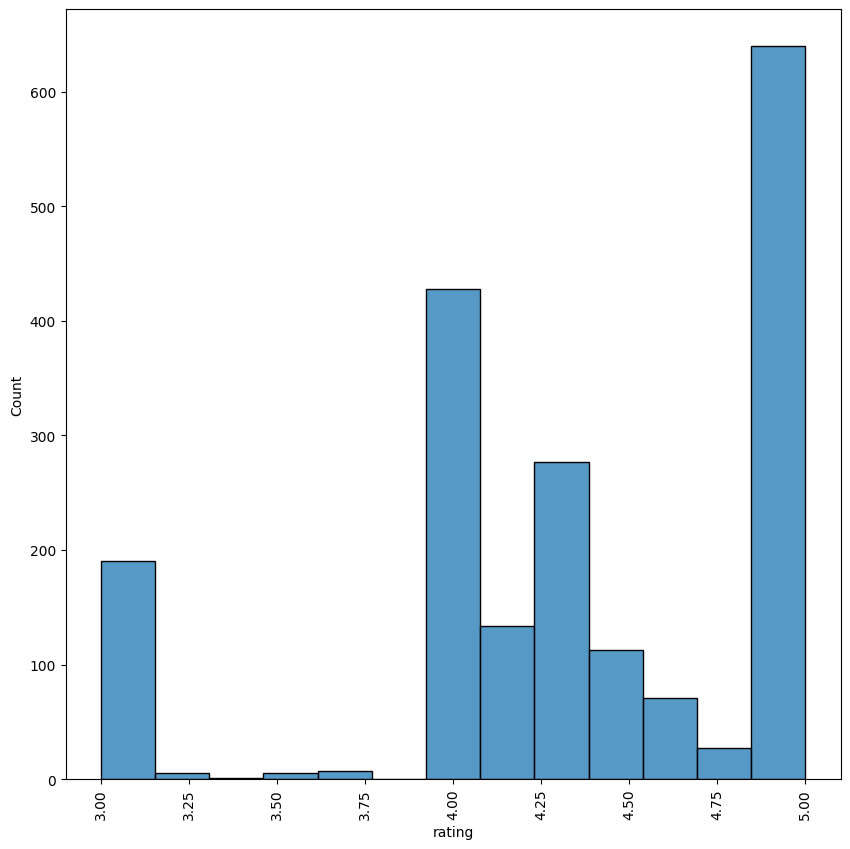

In [434]:

# Observations on rating
plt.figure(figsize=(10, 10))
#orderrating = df['rating'].value_counts().index
#sns.countplot(data=df,x='rating', order=orderrating)
sns.histplot(data=df,x='rating')
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='rating', ylabel='Count'>

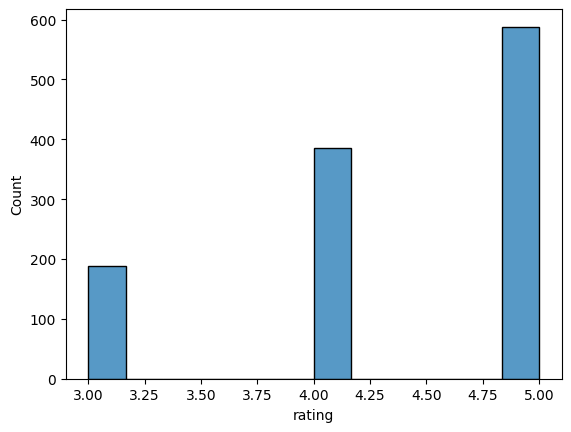

In [378]:

# Let's plot the rating counts for the original data set to have a better understanding
sns.histplot(data=df_original,x='rating')


<Axes: xlabel='rating', ylabel='count'>

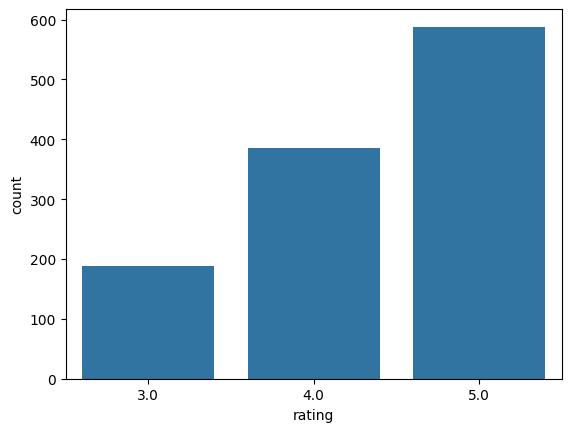

In [379]:

# Let's plot the rating counts for the original data set to have a better understanding
sns.countplot(data=df_original,x='rating')


####**Food Preparation Time**

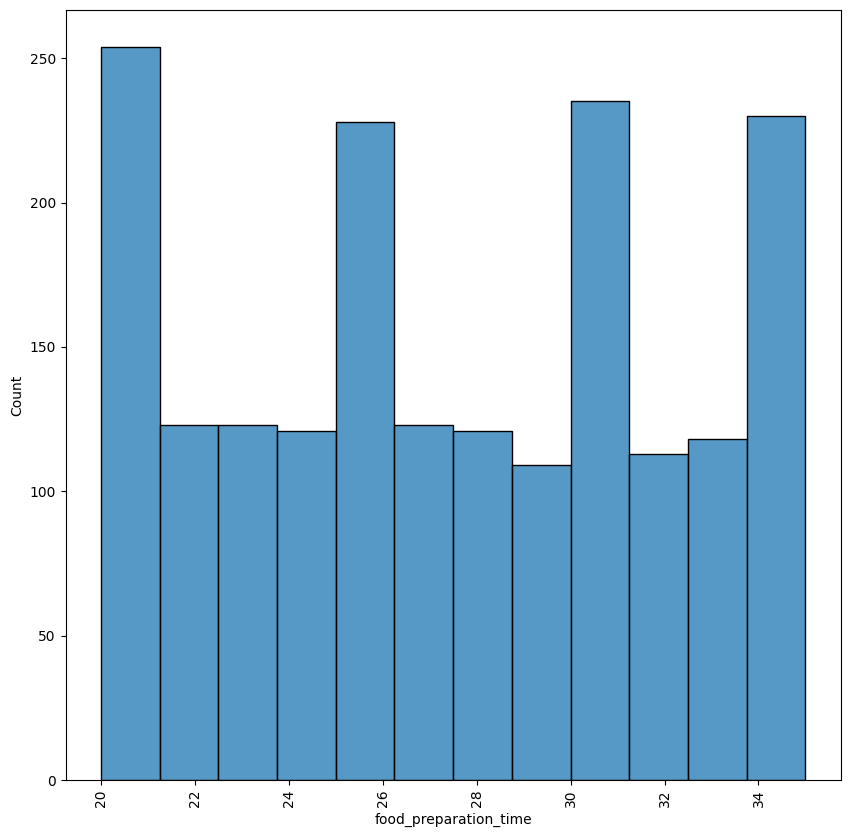

In [380]:

# Observations on food prep time
plt.figure(figsize=(10, 10))
sns.histplot(data=df,x='food_preparation_time')
plt.xticks(rotation=90)
plt.show()


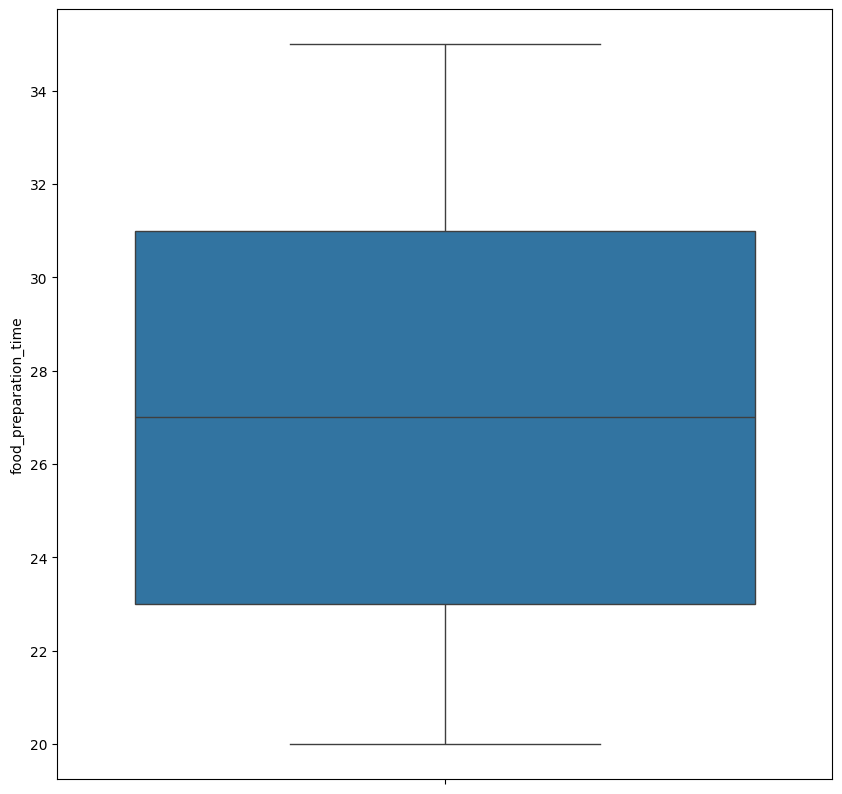

In [381]:

# 5 number summary for food prep time
plt.figure(figsize=(10, 10))
sns.boxplot(data=df,y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()


####**Delivery Time**

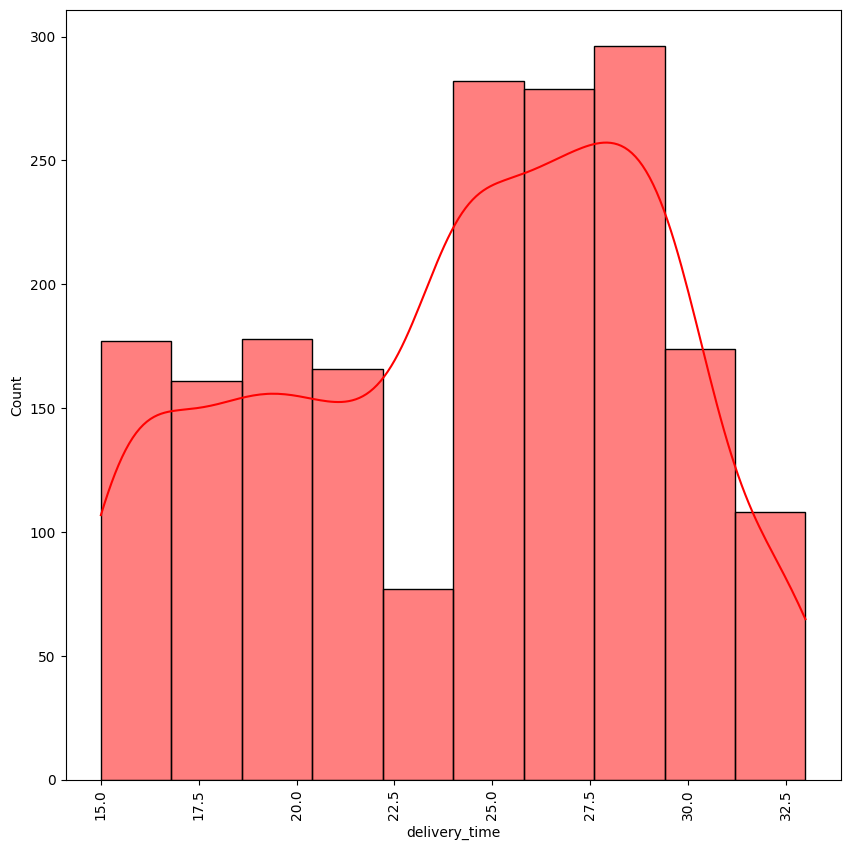

In [382]:

# Observations on delivery time
plt.figure(figsize=(10, 10))
sns.histplot(data=df,x='delivery_time', kde= True, color= 'red', bins=10)
plt.xticks(rotation=90)
plt.show()


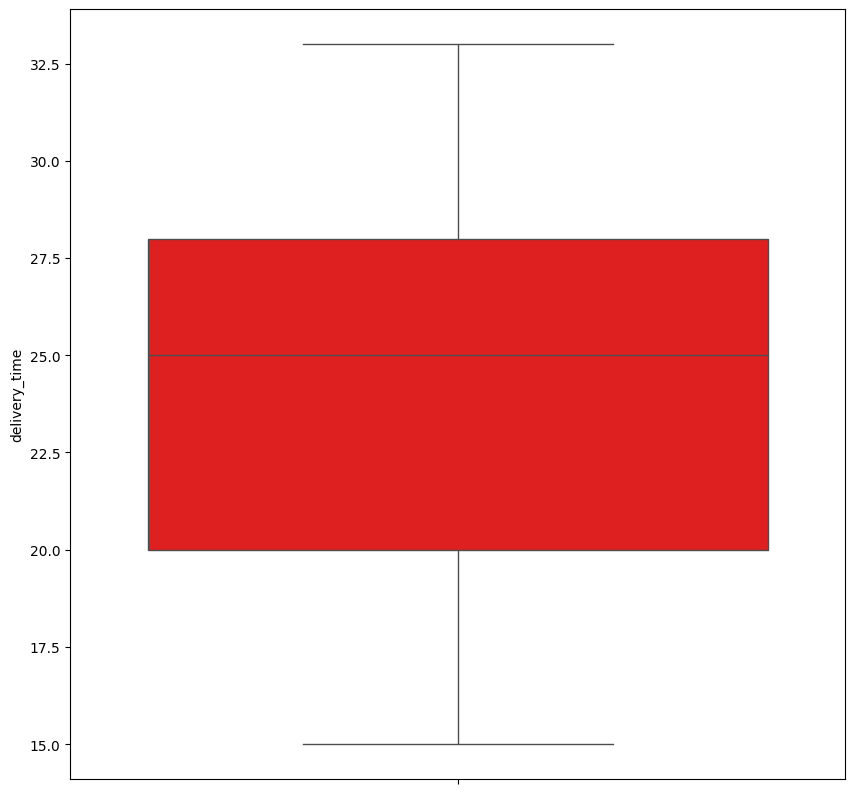

In [383]:

# 5 number summary for delivery time
plt.figure(figsize=(10, 10))
sns.boxplot(data=df,y='delivery_time' , color= 'red')
plt.xticks(rotation=90)
plt.show()


In [384]:

# Let's build a new variable that aggregates food prep and delivery time

df['total_del_time'] = df['food_preparation_time'] + df['delivery_time']

# Let's make sure the new column has been added correctly

df


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_del_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4.100000,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.333333,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.000000,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5.000000,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,4.219178,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.000000,23,31,54


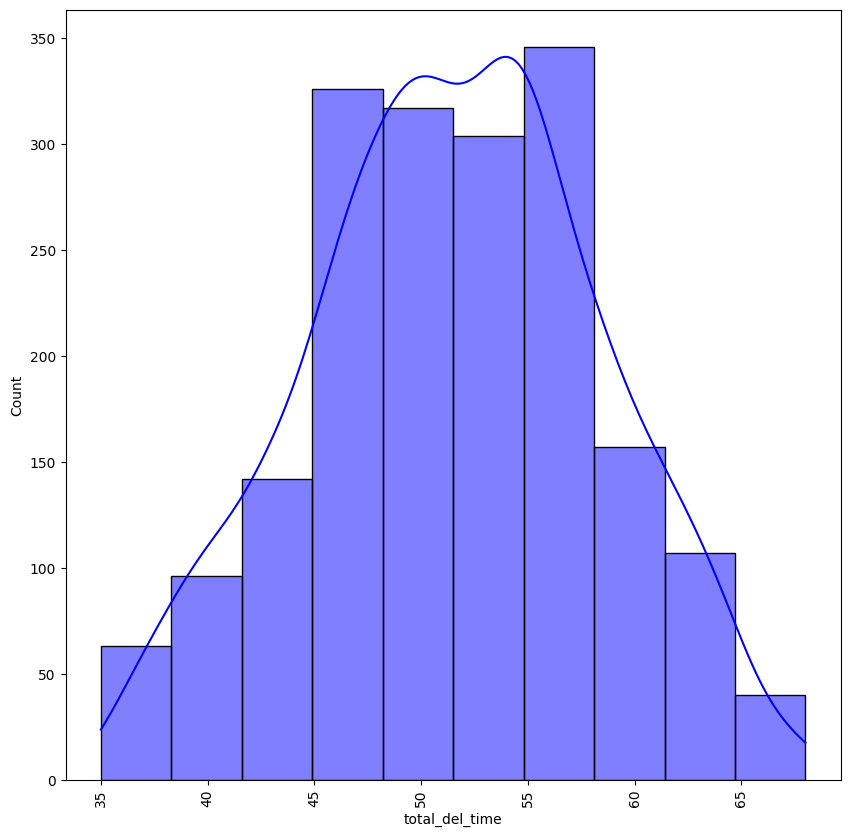

In [385]:

# Observations on delivery time
plt.figure(figsize=(10, 10))
sns.histplot(data=df,x='total_del_time', kde= True, color= 'blue', bins=10)
plt.xticks(rotation=90)
plt.show()


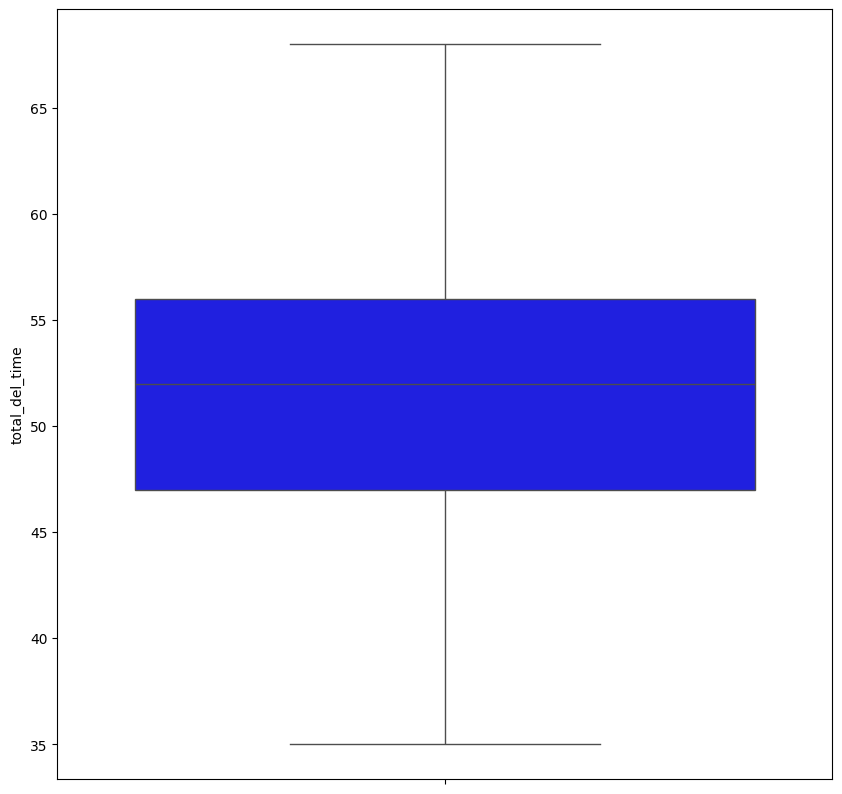

In [386]:

# 5 number summary for delivery time
plt.figure(figsize=(10, 10))
sns.boxplot(data=df,y='total_del_time' , color= 'blue')
plt.xticks(rotation=90)
plt.show()


**Cost**

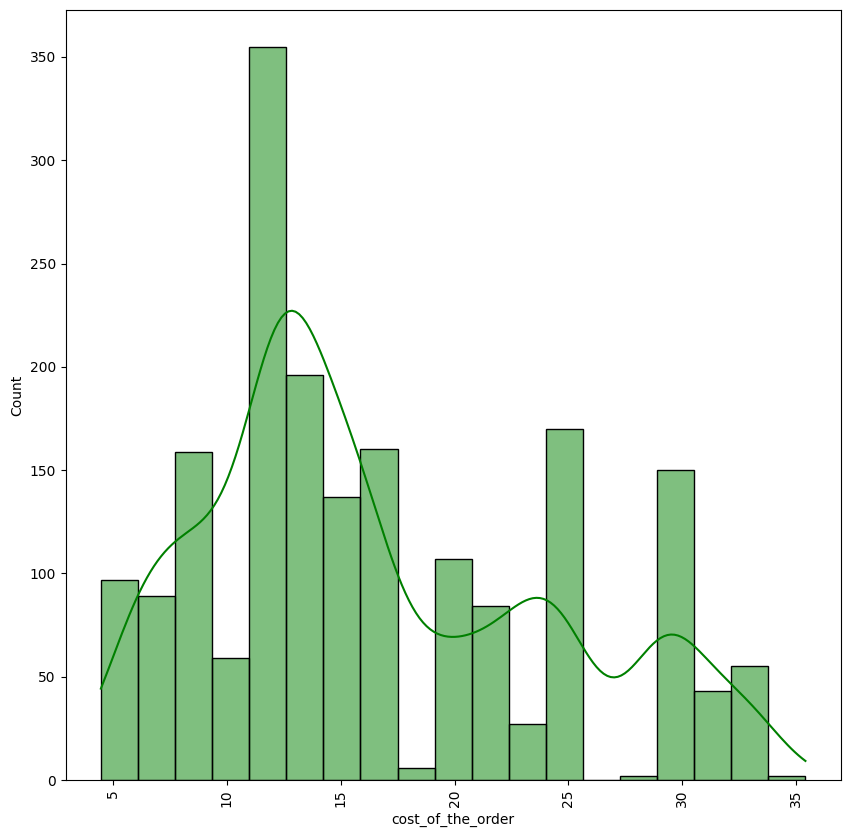

In [387]:

# Observations on cost of order
plt.figure(figsize=(10, 10))
sns.histplot(data=df,x='cost_of_the_order', kde= True, color= 'green')
plt.xticks(rotation=90)
plt.show()


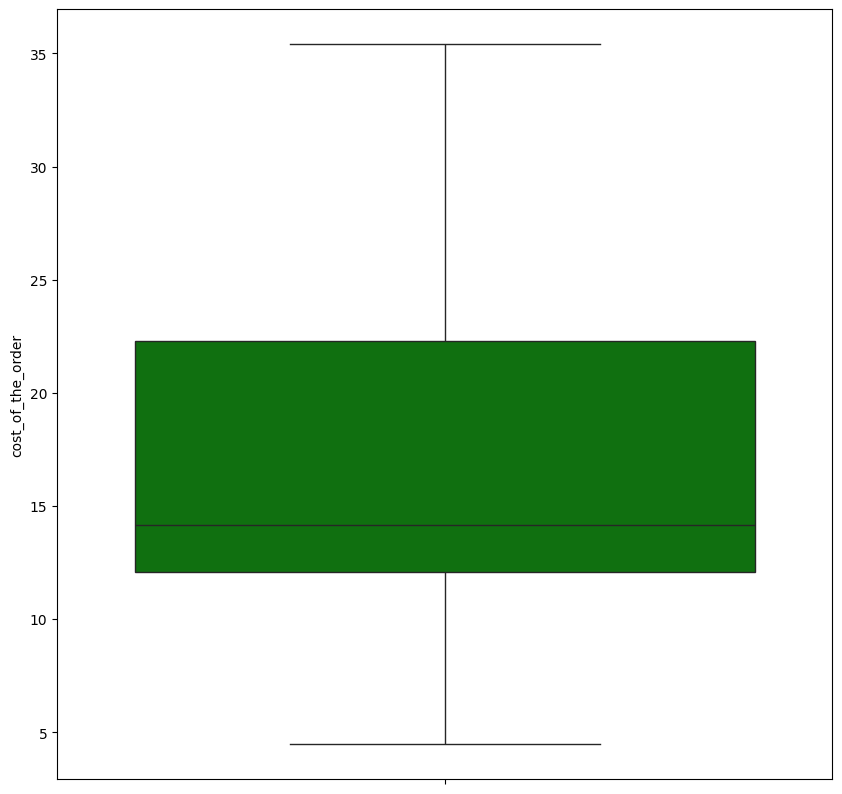

In [388]:

# Observations on cost of order
plt.figure(figsize=(10, 10))
sns.boxplot(data=df,y='cost_of_the_order', color= 'green')
plt.xticks(rotation=90)
plt.show()


**Observations:**

*The highest number of orders are made for Shake Shak, followed by the Meatball Shop

*American, Japanese and Italian have the highest amount of orders, whereas korean, spanish and vietnamese have the lowest amount of orders.

*The difference between the number of orders of vietnamese (7) and American cuisines (584) is substantial.

*About 70% of orders are made on the weekends.

*There are no ratings below 3 in the original data set.

*A rating of 5 is the most common, indicating a mode in the data. This suggests that customers are generally satisfied with their orders, as the highest possible rating is also the most frequently given.

*There is a clear downward trend in the rating count as the ratings decrease.

*Considering the absence of ratings 1 and 2, this could imply a selection bias or a tendency for customers to give a minimum rating of 3 out of 5.

*Food prepration times appear to be multi-modal, with several peaks, indicating common times for food preparation: 20, 26, 30, 34 minutes. With 20 minutes being the most common.

*About 75% of orders take under 31 minutes for being prepared.

*The delivery times appear to be multi-modal, with several peaks suggesting there are common time frames in which deliveries are completed.

*The highest peak is around 25 minutes, indicating this is a common delivery time for many orders. Other noticeable peaks occur at roughly 20 and 30 minutes.

*The large range of delivery times suggest a big difference in delivery performance, with the minimum at 15 minutes and maximum at more than double (32 minutes).

*75 % of orders are delivered before 28 minutes.

*The newly created variable 'total_del_time' captures the amount of total time a customer waits for his order. The distribution appears fairly symmetrical around the peak (50-55 minutes), suggesting that the total delivery and preparation times are normally distributed.

*The most common total time customers wait is 50-55 minutes.
The maximum total time a customer may wait is almost double the minimum, 65 vs 35 minutes.

*75% of customer orders take less than 55 minutes to be prepared and delivered.

*The cost per order seem to have different peaks around 12, 25 and 30 dollars, with the first one being the most common order cost, followed by 25$. The frequency of orders decreases as the cost increases. The lower basket range (12 dollars) receiving double the amount of orders compared to the 25 and 30 dollar peaks.

*The range of cost per order is large, going from 5 to 35 dollars. With 75% of orders below 22 dollars.

*No variable seem to hold any outliers given by there is no single points extending past the whiskers of their boxplots.

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received?

In [389]:

# top 5 restaurants in terms of the number of orders received
df['restaurant_name'].value_counts()


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

**Observations:**

Top 5 restaurants in descending order of orders are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm.

### **Question 8:** Which is the most popular cuisine on weekends?

In [390]:

# Observations on weekday vs weekends for different cuisine types
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()


day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Mexican            24
                 Indian             24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Middle Eastern     32
                 Mediterranean      32
                 Thai               15
                 French             13
                 Korean         

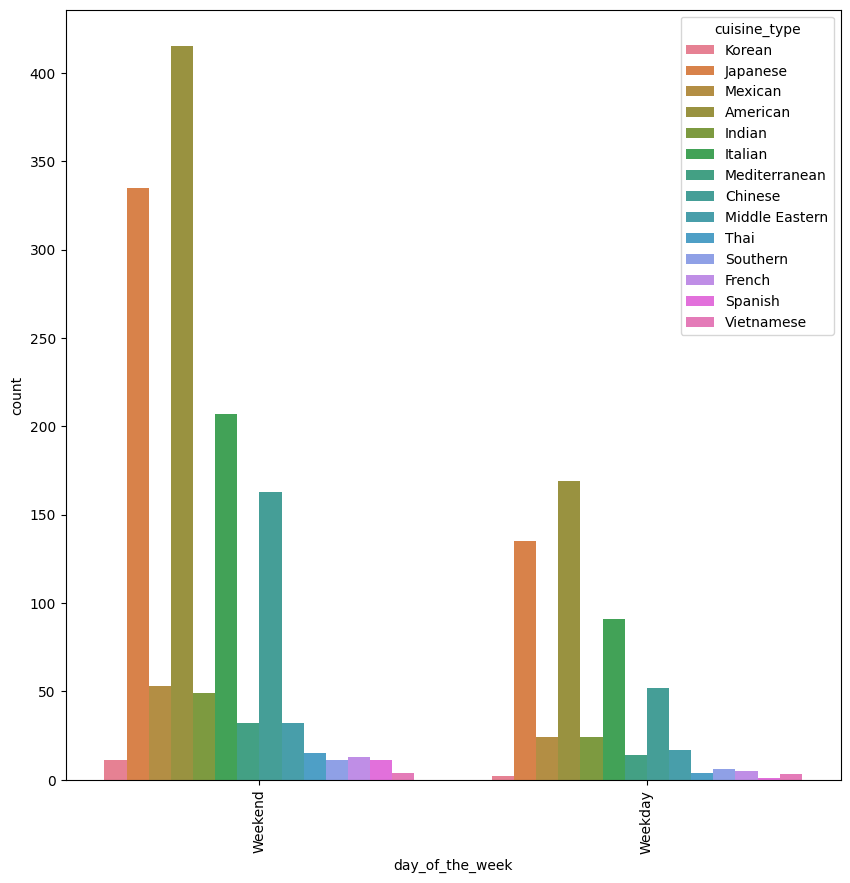

In [391]:

# Countplot of Observations on weekday vs weekends for different cuisine types
plt.figure(figsize=(10, 10))
sns.countplot(data=df,x='day_of_the_week', hue= 'cuisine_type')
plt.xticks(rotation=90)
plt.show()


**Observation:**

The most popular cuisine on the weekends in the American, followed by the Japanese type.
Amount of order decreases by more than half during weekdays.

### **Question 9:** What percentage of the orders cost more than 20 dollars?

In [392]:

# Let's filter the orders that cost more than 20$

df20 = df[df['cost_of_the_order']>20]['cost_of_the_order']

# Let's calculate the percentage by dividing the number of orders > 20$ and the total number of orders

percentage20 = (df20.count())/(df.shape[0])*100

print(round(percentage20, 2), '% of orders cost more than 20 dollars')


29.24 % of orders cost more than 20 dollars


**Observation:**

Observations:
29.24 % of orders cost more than 20 dollars


### **Question 10:** What is the mean order delivery time?

In [393]:

# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

meandeliverytime = df['delivery_time'].mean()

print('The mean order delivery time is', round(meandeliverytime, 1))


The mean delivery time for this dataset is 24.16 minutes
The mean order delivery time is 24.2


**Observations:**

The mean order delivery time is about 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [394]:

# Get the counts of  each customer_id
# Let's first find the ID's of the customers

df['customer_id'].value_counts()


customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

**Observations:**

The customer with ID 52832 is the most frequent customer with 13 orders, followed by customer ID 47440 with 10 orders and customer ID 83287 with 9 orders.

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

**Correlation Table and visualization**

In [395]:

# Select only numeric columns and calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print(correlation_matrix)


                       order_id  customer_id  cost_of_the_order    rating  \
order_id               1.000000    -0.013960           0.021171  0.008235   
customer_id           -0.013960     1.000000          -0.001322  0.002390   
cost_of_the_order      0.021171    -0.001322           1.000000  0.035595   
rating                 0.008235     0.002390           0.035595  1.000000   
food_preparation_time -0.007026    -0.030330           0.041527 -0.007280   
delivery_time          0.009690    -0.009885          -0.029949 -0.001265   
total_del_time         0.002288    -0.027754           0.006358 -0.005856   

                       food_preparation_time  delivery_time  total_del_time  
order_id                           -0.007026       0.009690        0.002288  
customer_id                        -0.030330      -0.009885       -0.027754  
cost_of_the_order                   0.041527      -0.029949        0.006358  
rating                             -0.007280      -0.001265       -0.00

<Axes: >

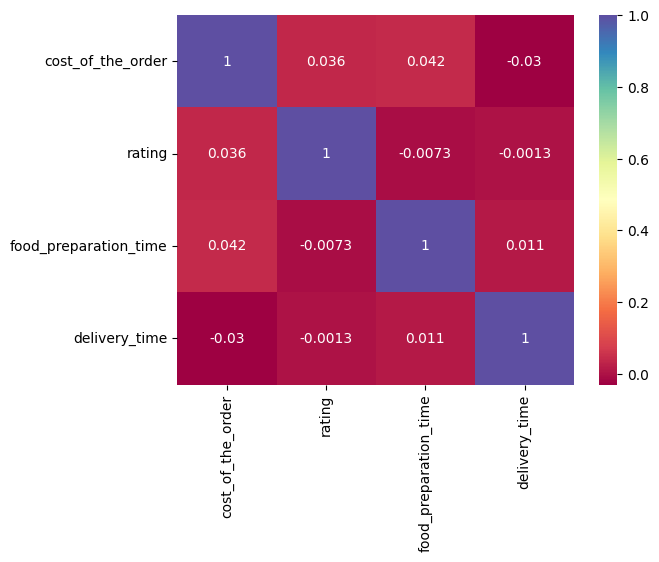

In [396]:

# Write the code here
# prompt:

# Let's plot the correlation table for all numerical variables
sns.heatmap(data=df[['cost_of_the_order','rating','food_preparation_time','delivery_time']].corr(), annot=True, cmap='Spectral')


<Axes: >

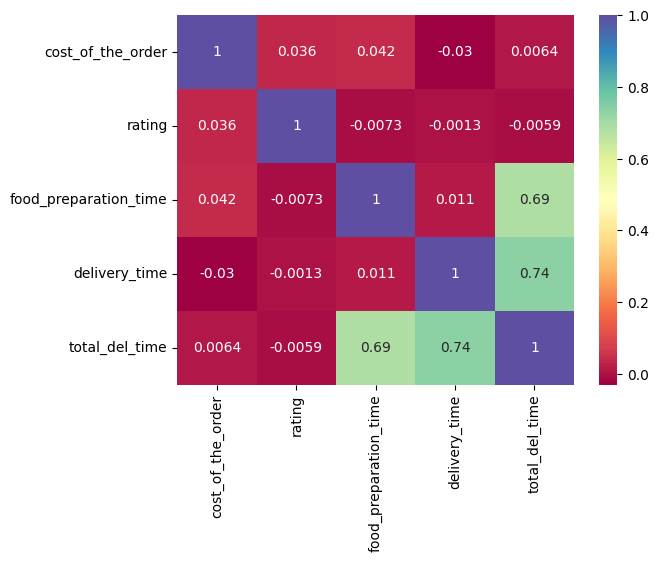

In [397]:

# We visualize the correlation table with a heatmap
sns.heatmap(data=df[['cost_of_the_order','rating','food_preparation_time','delivery_time','total_del_time']].corr(), annot=True, cmap='Spectral')


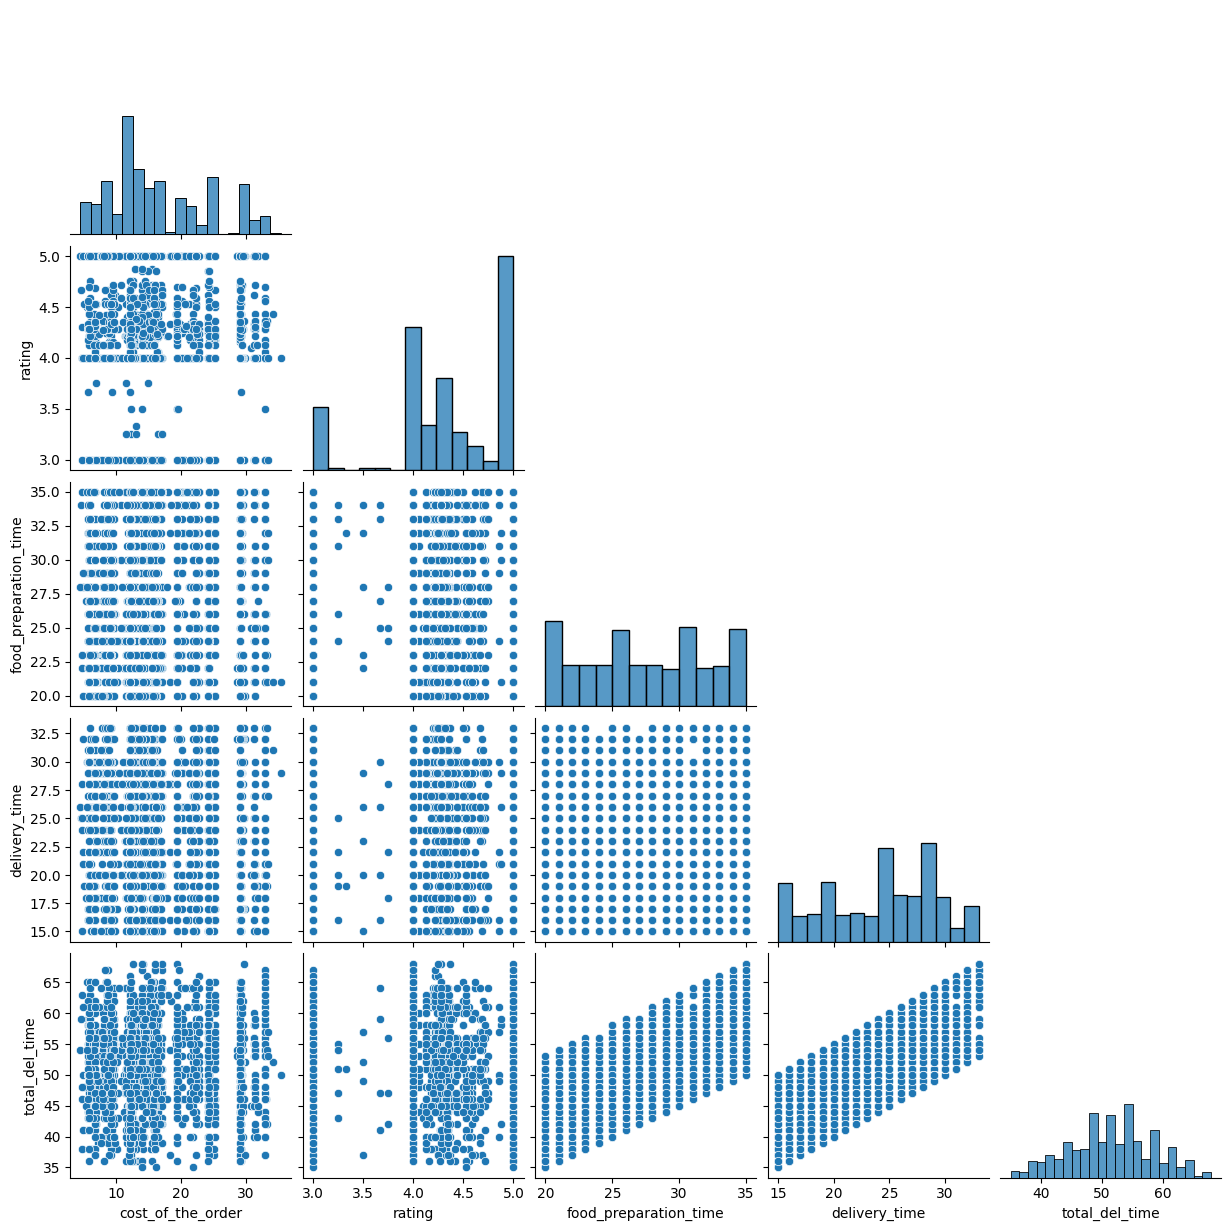

In [398]:

# let's vizalise this further with a pair plot.
sns.pairplot(df[['cost_of_the_order','rating','food_preparation_time','delivery_time','total_del_time']], corner= True)


**Observations:**

The table of correlations, the heatmap and the pair plot indicate that there is little to no correlation between variables.
The only clear positive correlation is between the total time to delivery and delivery time, and similarly between total time to delivery and food preparation time. This is normal as the total time to delivery is a feature that results from the aggregation of the delivery_time and food_preparation_time.

**Relationship between numerical and Categorical Variables**

#### Cuisine vs Cost of the order

<ipython-input-399-d4845c8bfb45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


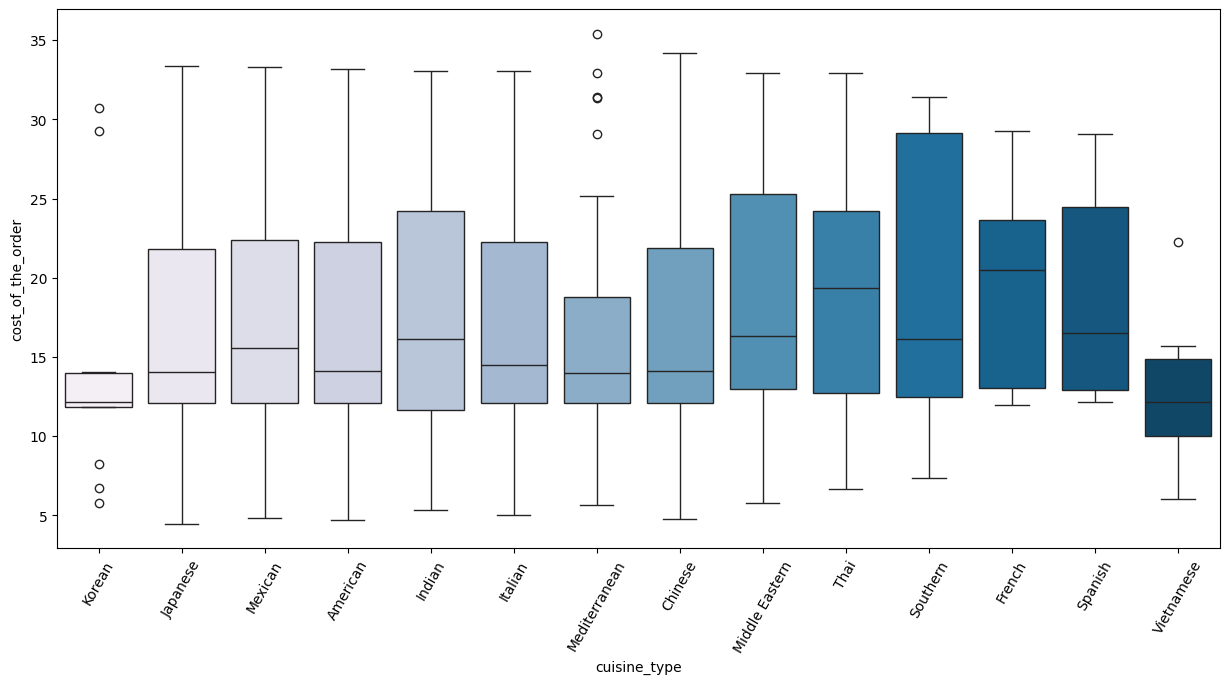

In [399]:

# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()


<ipython-input-400-4752064aee7f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='cuisine_type', y='cost_of_the_order', ci= False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

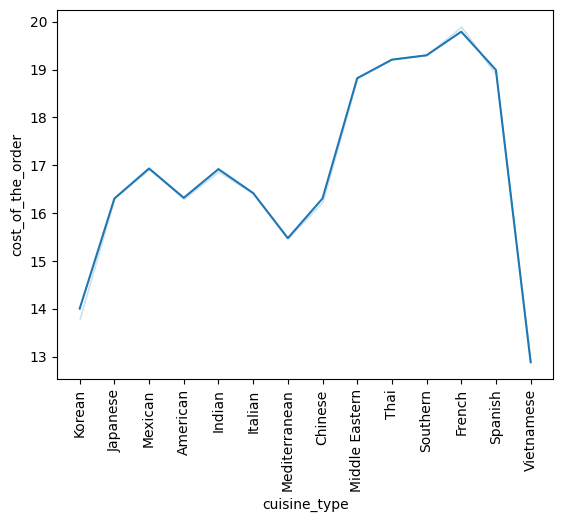

In [400]:

# it would be interesting to see the cost relative to the cuisine type, and have an idea of how many orders are in each group: strip plot
order = df.groupby(['cuisine_type'])['cost_of_the_order'].mean().index
sns.lineplot(data=df, x='cuisine_type', y='cost_of_the_order', ci= False)
plt.xticks(rotation=90)


#### Cuisine vs Food Preparation time

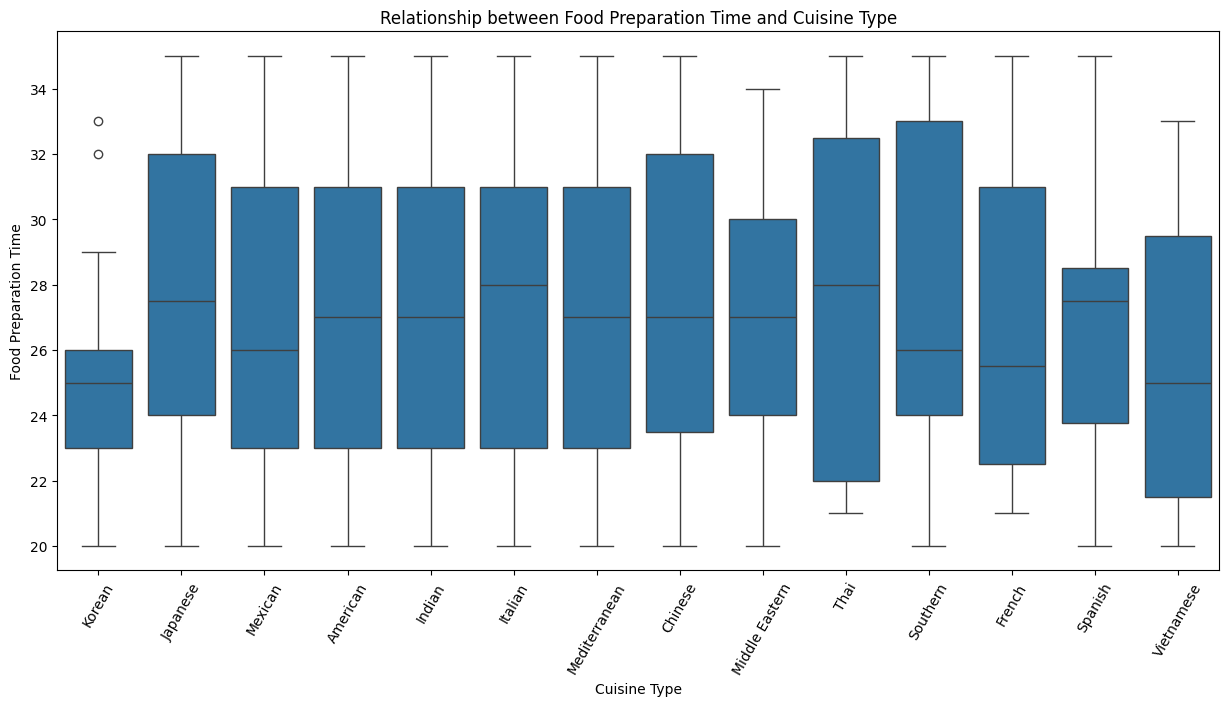

In [401]:

# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)  # Replace 'df' with the name of your DataFrame
plt.xticks(rotation=60)
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.title('Relationship between Food Preparation Time and Cuisine Type')
plt.show()


([0, 1], [Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')])

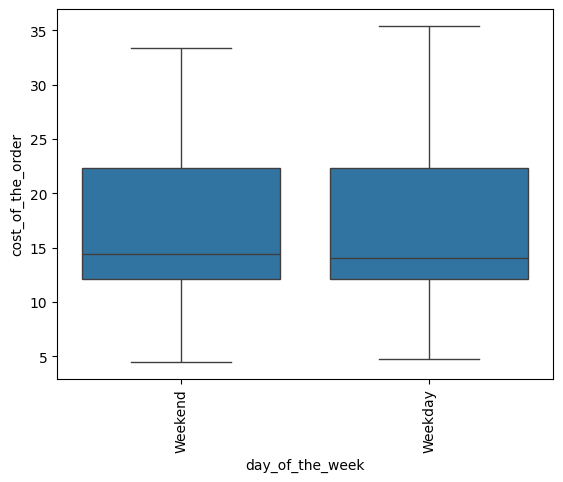

In [402]:

# it would be interesting to see the cost relative to the cuisine type, and have an idea of how many orders are in each group: strip plot

sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')

plt.xticks(rotation=90)


In [403]:

#plt.figure(figsize=(30,10))
#sns.lineplot(data=df, x='restaurant_name', y='cost_of_the_order')
#plt.xticks(rotation=90)


**Observations:**

The average cost seem to vary between cuisine type, with spanish and french being the restaurants with highest average cost per order.
The cost per order doesn't vary between weekends and weekdays, this indicates customers do not seem to change consuming habits depending on the day of the week.

The cost per order doesn't vary for restaurants having received 3 and 4 stars. Still, the median is slightly higher for restaurants that have received 5 stars. This alone is difficult to interpret, but it could indicate restaurants with 5 stars are more trusted on average and translates into more costly orders.

Food Preparation Time

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

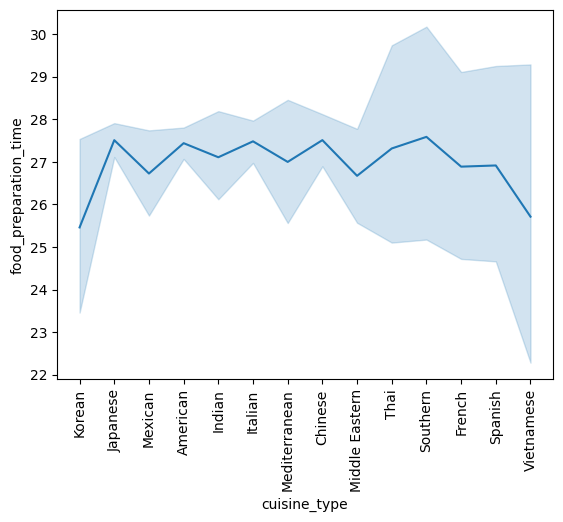

In [404]:

sns.lineplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90)


([0, 1], [Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')])

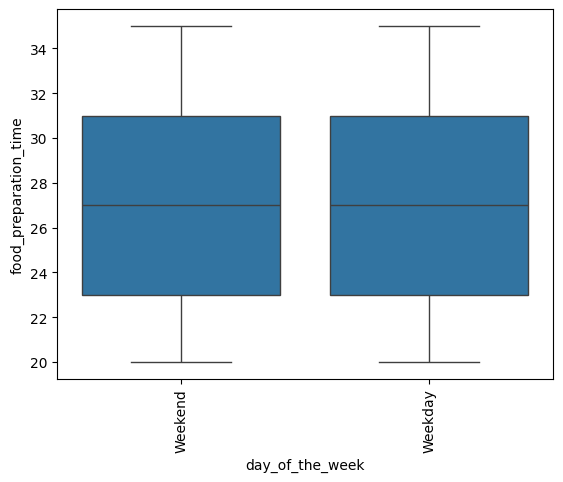

In [405]:

sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time')
plt.xticks(rotation=90)


**Observations:**

The average food preparation time doesn't vary much for different types of cuisine. On average, it stands aroud 25-28 minutes.
The food preparation time doesn't vary between weekends and weekdays.
The food preparation time and the total time doesn't vary between restaurants that have received different ratings.

Ratings:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

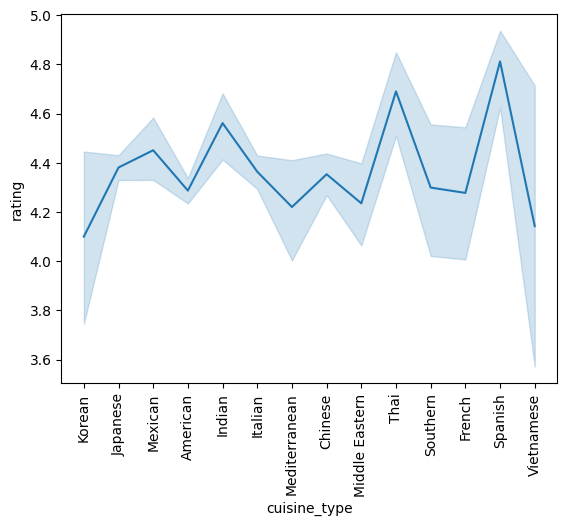

In [406]:

# we'll try to get an idea of how customers rate different cuisines
sns.lineplot(data=df, x='cuisine_type', y='rating')
plt.xticks(rotation=90)


**Obeservations:**

  Korean and Vietnamese seem to have the lowest average rating.

  While Thai and Spanish having the highest average rating.


*Time Bins - Slow, Average, Fast*

*Let's go deeper in our analysis and explore if there's a relationship beteween rating and total delivery times*

In [407]:

 # We'll transform the total delivery time into a categorical variable with 3 bins representing the speed of delivery: slow, average, fast.

df['total_del_time_bins'] = pd.cut(df['total_del_time'], bins= [35,47,57,65], labels= ['Fast', 'Average', 'Slow'], right=False)

df['total_del_time_bins'].value_counts(normalize=True)


total_del_time_bins
Average    0.543057
Fast       0.240581
Slow       0.216362
Name: proportion, dtype: float64

<Axes: xlabel='total_del_time_bins', ylabel='rating'>

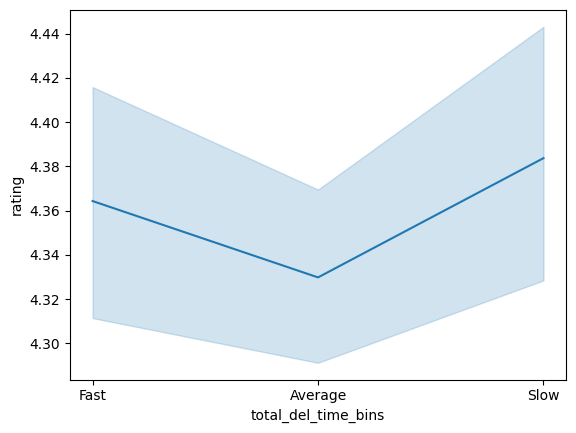

In [408]:

# Let's vizalize the relationship between total delivery time ranges and the average ratings with a lineplot
sns.lineplot(data=df, x='total_del_time_bins', y='rating')


**Observations:**

  The plot shows a 'V' shape, suggesting that ratings are higher for "Fast" and "Slow" delivery times compared to "Average" times. This could indicate that customers might have different expectations based on delivery time promises—very fast deliveries may exceed expectations, while very slow ones might be anticipated and compensated for by other factors (e.g., food quality).

  There's no clear linear relationship where delivery time consistently increases or decreases with better ratings. This suggests that delivery time might not be the only factor affecting customer satisfaction.

  The wide confidence intervals indicate there's a significant variance in ratings for each delivery time bin. This variability might be due to other factors not captured in the plot, such as food quality, order accuracy, customer service, or even individual customer bias.

  Without further analysis, there's little we can conclude on this plot alone.

*Cost Bins - Low, Mid, High*
*Let's go deeper in our analysis and explore if there's a relationship beteween cost and other variables.*

In [409]:

df['cost_bins'] = pd.cut(df['cost_of_the_order'], bins= [0,15,27,35], labels= ['Low', 'Mid', 'High'], right=False)

print(df['cost_bins'].value_counts(normalize=True))
df['cost_bins'].value_counts()


cost_bins
Low     0.531365
Mid     0.336321
High    0.132314
Name: proportion, dtype: float64


cost_bins
Low     1008
Mid      638
High     251
Name: count, dtype: int64

<Axes: xlabel='cost_bins', ylabel='count'>

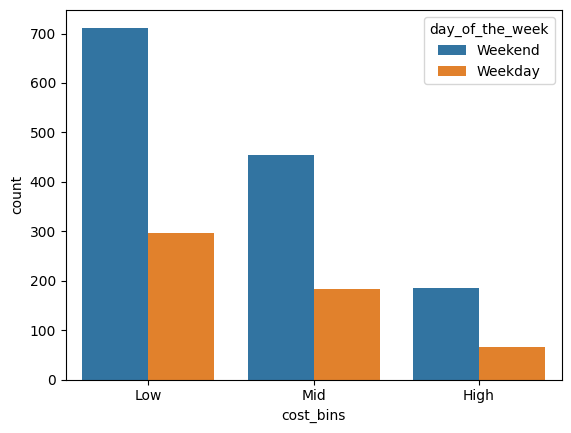

In [410]:

sns.countplot(data=df, x='cost_bins', hue='day_of_the_week')


<Axes: xlabel='cost_bins', ylabel='rating'>

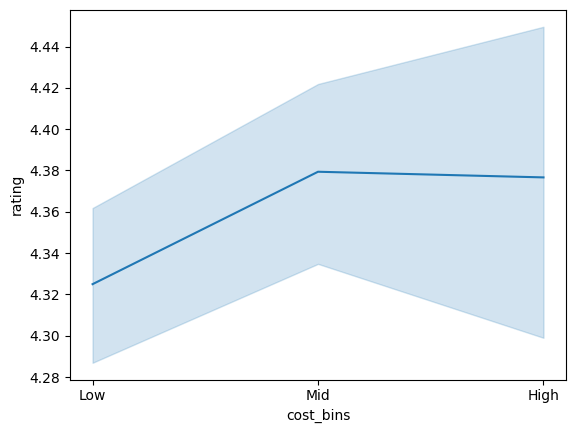

In [411]:

sns.lineplot(data=df, x='cost_bins', y='rating')


**Observations:**

  It appears that the majority of the orders fall into the 'Low' cost bin, with a significant drop in the frequency of 'Mid' and 'High' cost orders. This suggests that the service is mostly used for less expensive orders.

  There are notably more orders in the weekends than in the weekdays regardless of cost ranges.

  In the lineplot, there is about a 0.05 difference between the 'Low' and 'High' cost bins, this signifies about 1% change. Because our rating system goes from 1 to 5, and the sample size is quite large, it can still be meaningful.

  Finaly, the confidence interval is narrower for 'Low' cost orders, this could be explained by a larger amount of observation for the 'Low' cost bin, having 53% of the data. However it could also indicate more consistency in the ratings for these orders as compared to 'Mid' and 'High' cost orders.

#### Day of the Week vs Delivery time

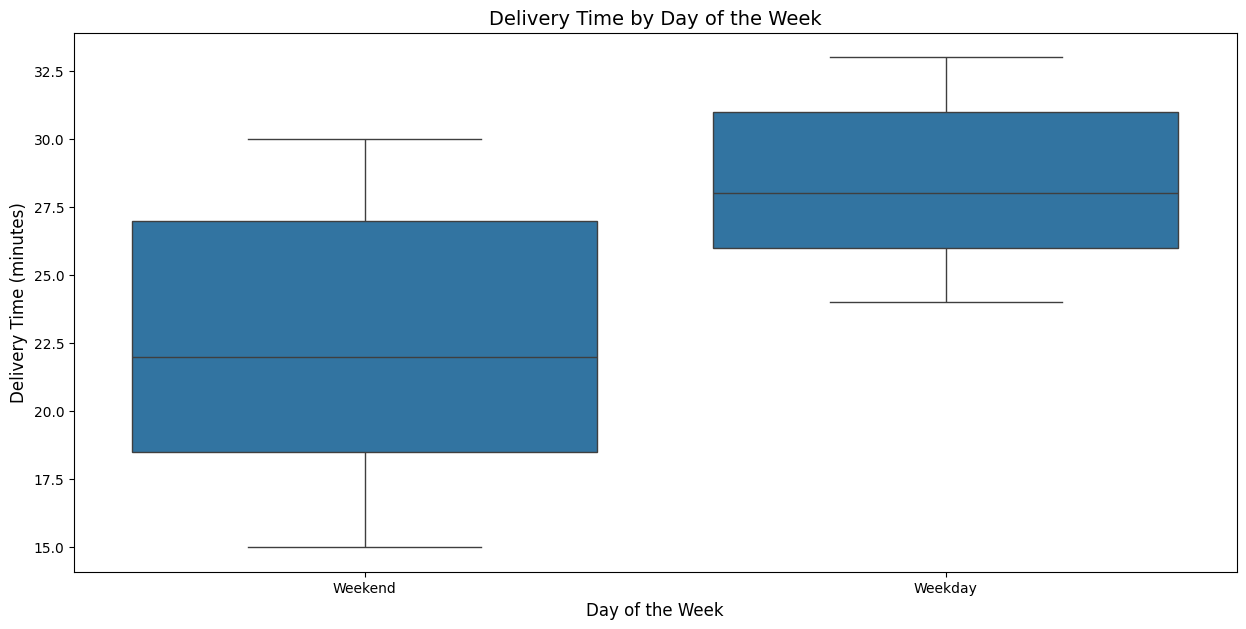

In [412]:

# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)
plt.title('Delivery Time by Day of the Week', fontsize=14)
plt.show()


#### Run the below code and write your observations on the revenue generated by the restaurants

---



In [413]:

df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)


restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

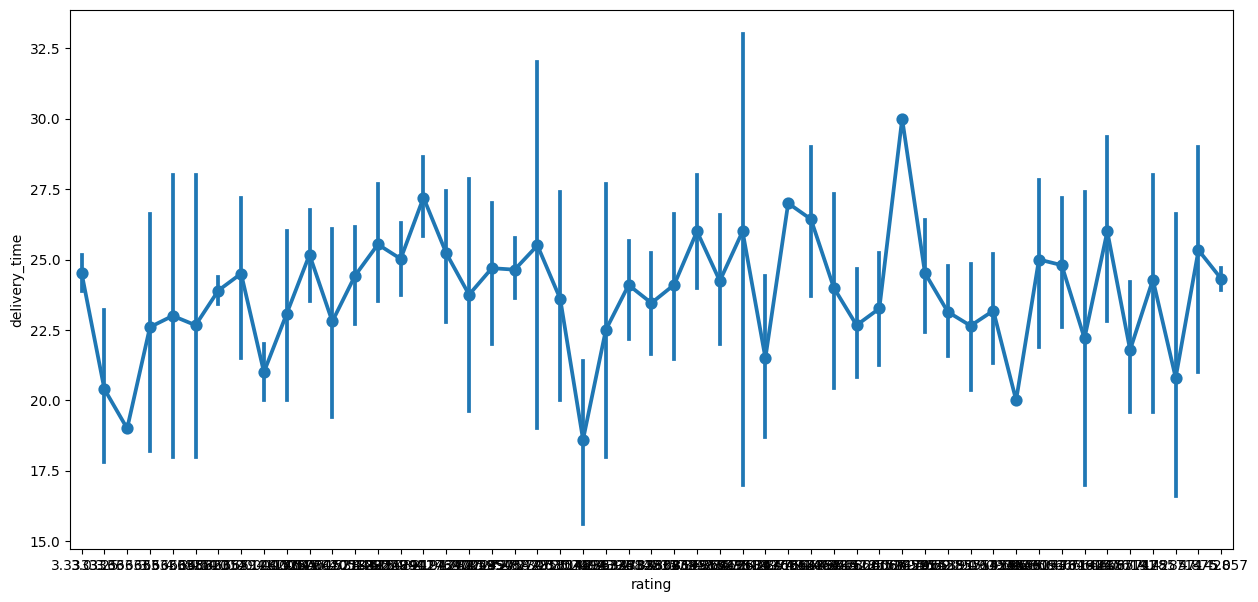

In [414]:

# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()


#### Rating vs Food preparation time

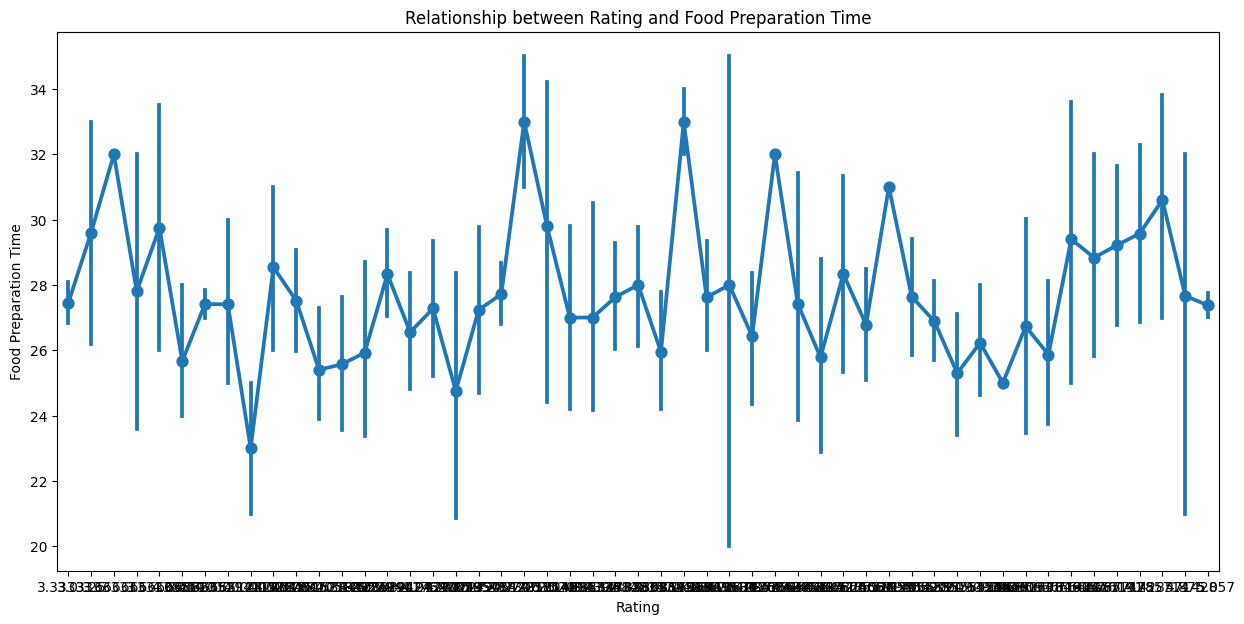

In [415]:

# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=df)  # Replace 'df' with the name of your DataFrame
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.title('Relationship between Rating and Food Preparation Time')
plt.show()


#### Rating vs Cost of the order

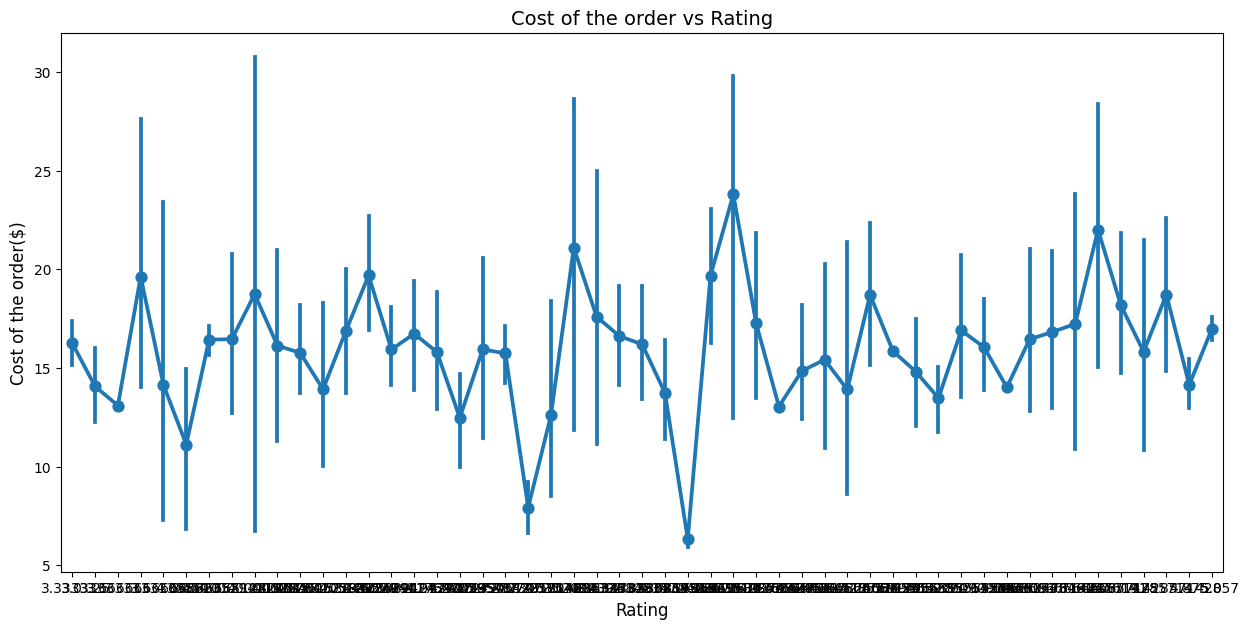

In [416]:

# Relationship between rating and cost of the order
plt.figure(figsize=(15,7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Cost of the order($)', fontsize=12)
plt.title('Cost of the order vs Rating', fontsize=14)
plt.show()


#### Correlation among variables

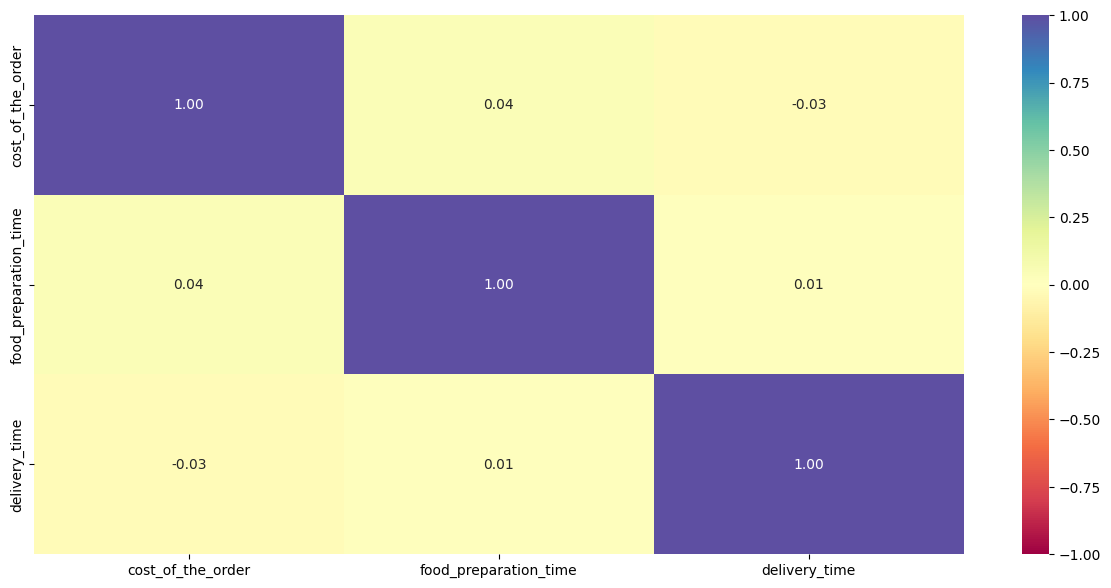

In [417]:

# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [418]:

# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()


,restaurant_name,rating
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


In [419]:

# Let's extract the restaurants that have more than 50 ratings
grouped_counts = df.groupby('restaurant_name')['rating'].count() #we store a new data frame with the rating counts for each restaurant
condition = grouped_counts > 50 #we define the condition

restaurant_list = grouped_counts[condition].index.tolist() #we create a new list and append the restaurants that fulfil the condition defined earlier

print(restaurant_list)


['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Parm', 'RedFarm Broadway', 'RedFarm Hudson', 'Shake Shack', 'The Meatball Shop']


In [420]:

# Let's extract the restaurants with an average rating greater than 4

grouped_means=df.groupby('restaurant_name')['rating'].mean() #we store a new data frame with the rating means for each restaurant
condition2 = grouped_means > 4  #we define the condition

restaurant_list_rating = grouped_counts[condition2].index.tolist()  #we create a new list and append the restaurants that fulfil the condition defined earlier

print(restaurant_list_rating)


["'wichcraft", '12 Chairs', '67 Burger', 'Alidoro', 'Amma', 'Anjappar Chettinad', 'Asuka Sushi', 'Aurora', 'Balade', 'Balthazar Boulangerie', 'Barbounia', 'Bareburger', 'Benihana', 'Bhatti Indian Grill', "Big Daddy's", 'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Bistango', 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Blue Ribbon Sushi Bar & Grill', 'Blue Ribbon Sushi Izakaya', 'Boqueria', "Bubby's ", 'Bukhara Grill', 'Burger Joint', 'Cafe Habana', 'Cafe Mogador', 'Cafe de La Esquina', "Carmine's", 'Chipotle Mexican Grill $1.99 Delivery', 'Cho Dang Gol', 'Chola Eclectic Indian Cuisine', 'Chote Nawab', 'Cipriani Le Specialita', "Coppola's East", 'Crema Restaurante', 'Delicatessen', 'DespaÌ±a', "Dickson's Farmstand Meats", 'Dig Inn Seasonal Market', 'Donburi-ya', 'Dos Caminos', 'Dos Caminos Soho', 'El Parador Cafe', 'Empanada Mama (closed)', 'Emporio', 'Five Guys Burgers and Fries', 'Five Leaves', 'Friend of a Farmer', 'Gaia Italian Cafe', 'Galli Restaurant', 'Grand Sichuan International', 'H

In [421]:

# The selected restaurant must fulfil both criteria, so let's see which restaurants are in common with both lists

selected_restaurant_list=[] # Create an empty list to hold common elements

# Iterate through the first list
for restaurant in restaurant_list_rating:
    if restaurant == 'Blue Ribbon Fried Chicken' or restaurant == 'Blue Ribbon Sushi' or restaurant ==  'Shake Shack' or restaurant ==  'The Meatball Shop':  # Check if the current element is in the second list
        selected_restaurant_list.append(restaurant) # If it is, append to the selected_restaurant_list

print('The restaurants fulfiling the criteria are:', selected_restaurant_list)


The restaurants fulfiling the criteria are: ['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


In [422]:

# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()


,restaurant_name,rating
0,The Meatball Shop,4.325758
1,Blue Ribbon Fried Chicken,4.218750
2,RedFarm Broadway,4.169492
3,Shake Shack,4.168950
4,Blue Ribbon Sushi,4.134454
5,RedFarm Hudson,4.109091
6,Parm,4.073529


**Observations:**

  There are 4 restaurants that have a rating count of more than 50 and an average rating of more than 4.

  The restaurants are: 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [423]:

# Lets filter the orders that are > 20 $:

df20 = df[df['cost_of_the_order']>20]['cost_of_the_order']

# Lets count the number of orders that are > 20$: (20$,Max_order_cost]

number_of_orders_over_20 = df20.shape[0]

print('There are', number_of_orders_over_20, 'orders that cost more than 20 dollars')


There are 555 orders that cost more than 20 dollars


In [435]:

# Lets filter the orders that cost between 5 $ and 20 $

df5_20 = df[(df['cost_of_the_order']<=20)&(df['cost_of_the_order']>5)]['cost_of_the_order']

# Lets count the nubmer of orders that cost between 5 $ and 20 $: (5$,20$]

number_of_orders_between_5_and_20 = df5_20.shape[0]

print('There are', number_of_orders_between_5_and_20, 'orders that cost more than 5 dollars but less or equal to 20 dollars')


There are 1334 orders that cost more than 5 dollars but less or equal to 20 dollars


In [425]:

# Lets apply 15% on these orders and sum them to get the total revenue from the orders that cost more than 5$ but less or equal to 20$:

revenue5_20 = (df5_20*0.15).sum()

print('Foodhub earns a total of', round(revenue5_20,1), 'dollars on orders that cost more than 5 dollars but less or equal to 20 dollars')


Foodhub earns a total of 2477.6 dollars on orders that cost more than 5 dollars but less or equal to 20 dollars


In [426]:

# Function to determine the revenue
# Apply the compute_rev function to the cost_of_the_order column
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)

# Display the first 5 rows
print(df[['cost_of_the_order', 'Revenue']].head().to_markdown(index=False, numalign="left", stralign="left"))


| cost_of_the_order   | Revenue   |
|:--------------------|:----------|
| 30.75               | 7.6875    |
| 12.08               | 1.812     |
| 12.23               | 1.8345    |
| 29.2                | 7.3       |
| 11.59               | 1.7385    |


In [427]:

# Calculate the sum of the `Revenue` column
total_rev = df['Revenue'].sum()

# Round `total_rev` to 2 decimal places and print the result
print('The net revenue is around', round(total_rev, 2), 'dollars')


The net revenue is around 6166.3 dollars


####**Observations:**


  Foodhub total revenue accross all orders (1898) is 6166.3 dollars

  The compute_rev function calculates revenue based on the value of a variable x. It seems like this function is designed to calculate revenue based on the cost of an order, with different rates for different cost ranges.
  
  Given that the column representing the cost of the order is cost_of_the_order, we will apply the compute_rev function to this column to calculate the revenue for each order.

  The column Revenue appears to be relevant here. Given that it is already of type float64, it is suitable for our calculations. We can use the sum() method to calculate the total revenue.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [428]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

# Let's filter the orders that cost more than 20$

df20 = df[df['cost_of_the_order']>20]['cost_of_the_order']

# Let's calculate the percentage by dividing the number of orders > 20$ and the total number of orders

percentage20 = (df20.count())/(df.shape[0])*100

print(round(percentage20, 2), '% of orders cost more than 20 dollars')

29.24 % of orders cost more than 20 dollars


In [429]:

# Let's build a new variable that aggregates food prep and delivery time

df['total_del_time'] = df['food_preparation_time'] + df['delivery_time']

# Let's make sure the new column has been added correctly

df


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_del_time,total_del_time_bins,cost_bins,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4.100000,25,20,45,Fast,High,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.333333,25,23,48,Average,Low,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28,51,Average,Low,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15,40,Fast,High,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24,49,Average,Low,1.7385,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.000000,31,17,48,Average,Mid,5.5775,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5.000000,31,19,50,Average,Low,1.8270,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,4.219178,31,24,55,Average,Mid,6.3050,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.000000,23,31,54,Average,Low,1.8270,54


In [430]:

# Let's calculate the percentage of orders taking more than 60 minutes

number_over_60 = df[df['total_del_time']> 60].shape[0]
total_orders = df.shape[0]

Percentage_over_60 = round(number_over_60/total_orders*100, 2)

print('There are', Percentage_over_60, '% of orders taking more than 60 minutes to get delivered from the time the order is placed')


There are 10.54 % of orders taking more than 60 minutes to get delivered from the time the order is placed


####**Observations:**

  There are 10.54 % of orders taking more than 60 minutes to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [431]:

# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')



The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


In [432]:

# Let's check the average delivery times depending on weekdays and weekends

df.groupby(['day_of_the_week']) ['delivery_time'].mean()


day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

<ipython-input-433-30245a034dd1>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='day_of_the_week', y= 'delivery_time', ci= False, markers= True, color= 'red')


<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

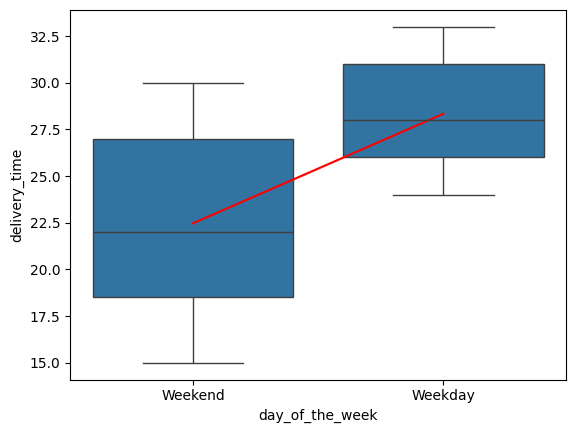

In [433]:

# Let's plot the results to get a clearer view on the distributions

sns.boxplot(data=df, x='day_of_the_week', y= 'delivery_time')

# we can add a line to highlight how the mean varies between weekends and weekdays.

sns.lineplot(data=df, x='day_of_the_week', y= 'delivery_time', ci= False, markers= True, color= 'red')


###**Observations:**


  We can see that weekdays have a higher average delivery times than weekends

  Weekends have higher variance in delivery times. This variance in delivery time decereases on the weekdays.

  This indicates customers on average wait more for their orders on weekdays than on weekends, even though the demand is higher during weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

###**Conclusions:**

Here are some insights and considerations based on my conclusions:


Data Quality:

The dataset offers a comprehensive view of customer behavior and restaurant performance, thanks to its mix of numerical and categorical variables.
The significant number of missing ratings (736) necessitates careful imputation strategies to ensure unbiased analysis. Consider exploring reasons for non-response or using advanced imputation techniques to fill in missing values.

Demand Analysis:

Demand is concentrated on specific cuisines (American, Japanese, Italian) and restaurants (Shake Shack, The Meatball Shop). FoodHub can leverage this by:
Partnering with popular restaurants or expanding their offerings within these cuisines.
Promoting lesser-known restaurants with similar cuisines to diversify choices.
The strong weekend demand presents an opportunity for targeted promotions and optimized staffing to meet the increased volume.

Customer Experience:

The absence of ratings below 3 stars raises concerns about potential bias in feedback collection. To mitigate this:
Encourage feedback from all customers, especially those with less positive experiences.
Implement anonymous feedback mechanisms to reduce hesitancy in providing critical reviews.
Actively solicit feedback through post-order surveys or targeted campaigns.
While delivery times are generally efficient, the overall wait time (preparation + delivery) could be improved. FoodHub can:
Collaborate with restaurants to streamline food preparation processes.
Optimize delivery routes and logistics to reduce travel times.
Explore technology solutions like real-time tracking to manage customer expectations.

Pricing:

The concentration of orders below $22 suggests a price-sensitive customer base.  Consider offering discounts or promotions for first-time users or during off-peak hours to attract more customers.

The presence of a premium segment (29.24% of orders over $20) indicates a willingness to pay for higher-quality or larger orders.  This segment could be targeted with premium offerings or upselling strategies.  


Operational Efficiency:

Average delivery times are relatively consistent and efficient. Maintain this performance by monitoring delivery routes and addressing any bottlenecks that may arise.
Further analyze preparation times by restaurant and cuisine to identify potential areas for improvement. Collaborate with restaurants to share best practices or provide training for faster preparation.


###**Recommendations:**

These recommendations are to provide actionable insights for FoodHub to improve their business to further enhance the recommendations:



**1. Enhance Data Collection and Analysis:**

*   **Improve Rating Collection:**
    *   Implement a more prominent and user-friendly rating system within the app.
    *   Consider using gamification elements (e.g., badges, rewards) to incentivize ratings.
    *   Send automated post-order reminders encouraging customers to rate their experience.
    *   Analyze the relationship between ratings and other variables (e.g., time of day, cuisine type) to identify potential areas for improvement.

*   **Address Missing Data:**
    *   Explore techniques for imputing missing rating values while minimizing bias (e.g., using machine learning models to predict ratings based on other features).
    *   Collect additional data during the ordering process to understand why some customers choose not to rate their orders.

**2. Refine Marketing and Targeting Strategies:**

*   **Leverage Popular Cuisines and Restaurants:**
    *   Partner with highly-rated restaurants within the most popular cuisines (American, Japanese, Italian).
    *   Create targeted marketing campaigns for these cuisines and restaurants, highlighting their popularity and positive reviews.
    *   Offer special promotions or discounts on popular items from these establishments.

*   **Diversify Cuisine Options:**
    *   Identify gaps in the market where certain cuisines are underrepresented despite having potential for high demand (e.g., Spanish).
    *   Actively seek out partnerships with restaurants offering these cuisines to expand customer choice and cater to diverse preferences.

*   **Capitalize on Weekend Demand:**
    *   Design special weekend promotions or deals to attract more customers.
    *   Ensure adequate staffing and resources to handle the increased order volume during weekends.

**3. Optimize Pricing Strategies:**

*   **Tiered Pricing System:**
    *   Implement a tiered pricing system with different commission rates for low, mid, and high-priced orders. This could help maximize revenue while ensuring fairness and flexibility for different customer segments.
    *   Analyze the impact of different pricing tiers on order volume and revenue to find the optimal balance.

*   **Dynamic Pricing:**
    *   Explore dynamic pricing strategies that adjust commission rates based on demand, time of day, or other factors.
    *   Test the effectiveness of dynamic pricing through pilot programs and monitor its impact on customer behavior and revenue.

**4. Enhance Operational Efficiency:**

*   **Analyze and Optimize Preparation Times:**
    *   Identify restaurants or cuisine types with consistently longer preparation times and collaborate with them to improve efficiency.
    *   Share best practices between restaurants and provide training or resources to help them optimize their processes.

*   **Delivery Time Optimization:**
    *   Analyze the factors (e.g., distance, traffic, time of day) that contribute to longer delivery times.
    *   Explore route optimization algorithms or tools to find the most efficient delivery routes.
    *   Consider using real-time tracking to provide customers with accurate delivery estimates and manage their expectations.

**5. Build Customer Loyalty:**

*   **Loyalty Programs:**
    *   Create a loyalty program that rewards frequent customers with points, discounts, or exclusive offers.
    *   Segment customers based on their ordering behavior and tailor loyalty programs to their preferences.

*   **Personalized Recommendations:**
    *   Leverage customer data to provide personalized recommendations for restaurants or dishes based on their past orders and preferences.
    *   Use collaborative filtering or other recommendation algorithms to suggest new items or cuisines that customers might enjoy.

**Additional Recommendations:**

Conduct customer segmentation analysis to tailor marketing and promotions to specific customer groups.
Analyze geographical patterns in demand to optimize restaurant selection and delivery coverage.
Consider incorporating external data sources (e.g., weather, events) to understand factors that influence demand and adjust operations accordingly.
By addressing these areas, FoodHub can improve its overall customer experience, operational efficiency, and revenue generation.

**Additional Considerations:**

*   **Customer Feedback Loop:**  Continuously gather and analyze customer feedback to identify areas for improvement and track the effectiveness of implemented changes.
*   **Competitive Analysis:** Monitor competitors' offerings, pricing strategies, and customer reviews to stay ahead of the curve.
*   **Market Research:**  Conduct regular market research to identify emerging trends and adjust your offerings accordingly.

By implementing these recommendations and continuously iterating on their strategies, FoodHub can enhance customer satisfaction, improve operational efficiency, and drive sustained growth in the competitive online food delivery market.



---